# Supervised Learning - Foundations Project: ReCell

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.


### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.


### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [2]:
# Installing the libraries with the specified version.
# uncomment and run the following line if Google Colab is being used
!pip install scikit-learn==1.2.2 seaborn==0.13.1 matplotlib==3.7.1 numpy==1.25.2 pandas==1.5.3 -q --user

In [3]:
# Installing the libraries with the specified version.
# uncomment and run the following lines if Jupyter Notebook is being used
# !pip install scikit-learn==1.2.2 seaborn==0.11.1 matplotlib==3.3.4 numpy==1.24.3 pandas==1.5.2 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

### Import Necessary Libraries

In [4]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
from sklearn.linear_model import LinearRegression

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [5]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Reading the Data into a DataFrame

In [6]:
#Read data of the dataset
data = pd.read_csv('/content/drive/MyDrive/dataset/used_device_data.csv')

In [7]:
# copying data to another variable to avoid any changes to original data
df = data.copy()

## Data Overview

### Displaying the first few rows of the dataset

In [8]:
# view the first 5 rows of the dataset
df.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


#### Observation


* The dataset contains information about different attributes of used or refurbished phones and tablets.
*   The OS is mainly Android on the dataset.



### Displaying the last few rows of the dataset

In [9]:
# view the last 5 rows of the dataset
df.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


#### Observation

* The main camera seems to be missing for some of its dataset.




### Checking the shape of the dataset

In [10]:
# view the shape of the dataset
df.shape

(3454, 15)

#### Observation


*  The dataset contains information about a sample of 3454 in rows with 15 columns.



### Checking the data types of the columns for the dataset

In [11]:
# Data types of the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

#### Observation


*   There are 11 numeric (float and int datatype) and 4 string (object datatype) columns in the data.
*   The target variable is the used phone/tablet price on the dataset, which is of float datatype.
*   There are a lot of missing values in the dataset.



### Statistical summary of the dataset

In [12]:
# Statistical summary of the dataset
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
brand_name,3454,34,Others,502,NaN,NaN,NaN,NaN,NaN,NaN,NaN
os,3454,4,Android,3214,NaN,NaN,NaN,NaN,NaN,NaN,NaN
screen_size,3454.0,NaN,NaN,NaN,13.713115,3.80528,5.08,12.7,12.83,15.34,30.71
4g,3454,2,yes,2335,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5g,3454,2,no,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_camera_mp,3275.0,NaN,NaN,NaN,9.460208,4.815461,0.08,5.0,8.0,13.0,48.0
selfie_camera_mp,3452.0,NaN,NaN,NaN,6.554229,6.970372,0.0,2.0,5.0,8.0,32.0
int_memory,3450.0,NaN,NaN,NaN,54.573099,84.972371,0.01,16.0,32.0,64.0,1024.0
ram,3450.0,NaN,NaN,NaN,4.036122,1.365105,0.02,4.0,4.0,4.0,12.0
battery,3448.0,NaN,NaN,NaN,3133.402697,1299.682844,500.0,2100.0,3000.0,4000.0,9720.0


#### Observation
The above table displays the descriptive analysis columns


*   The cost of **used phones and tablets** varies, with the highest at 6.61 euros, the minimum at 1.53 euros, and averagely at 4.40 euros..
*   The cost of **new phones and tablets** varies, with the highest at 7.84 euros, the minimum at 2.90 euros, and averagely at 5.24 euros.
*  The **battery** energy capacity varies, with the highest at 9720 mAh, the minimum at 500 mAh, and averagely at 3000 mAh
*   The **RAM** varies to devices, with the highest at 12.0 GB, the minimum at 0.02 GB, and averagely at 4.0 GB.
*   The resolution of the **main camera in megapixels** varies, with the highest at 48.0, the minimum at 0.08, and averagely at 8.0.
*   The resolution of the **selfie camera in megapixels** varies to devices, with the highest at 32.0, the minimum at 0.00, and averagely at 5.0.
*  The **days of used/refurbished** devices have been used, with the highest at 1094, the minimum at 91, and averagely at 690.
*   There are 34 different types of **brand names**, the highest being others with a frequency of 502.
*   There are 4 different types of **OS**, the highest being Android with a frequency of 3214.
*   There are 2 different types of **4G and 5G** phones, respectively, with a frequency for each at 2335 and 3302.



### Checking for duplicate values


In [13]:
# checking for duplicate in the dataset
df.duplicated().sum()

0

#### Observation

There are no duplicate in the dataset.

### Checking for missing values

In [14]:
# checking for missing values in the dataset
df.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


#### Observation

There are missing values in the dataset listed below:
*   main_camera_mp
*   selfie_camera_mp
*   int_memory
*   ram
*   battery
*  weight





## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

### Univariate Analysis

In [15]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [16]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**What does the distribution of normalized used device prices look like?**

**`normalized_used_price`**

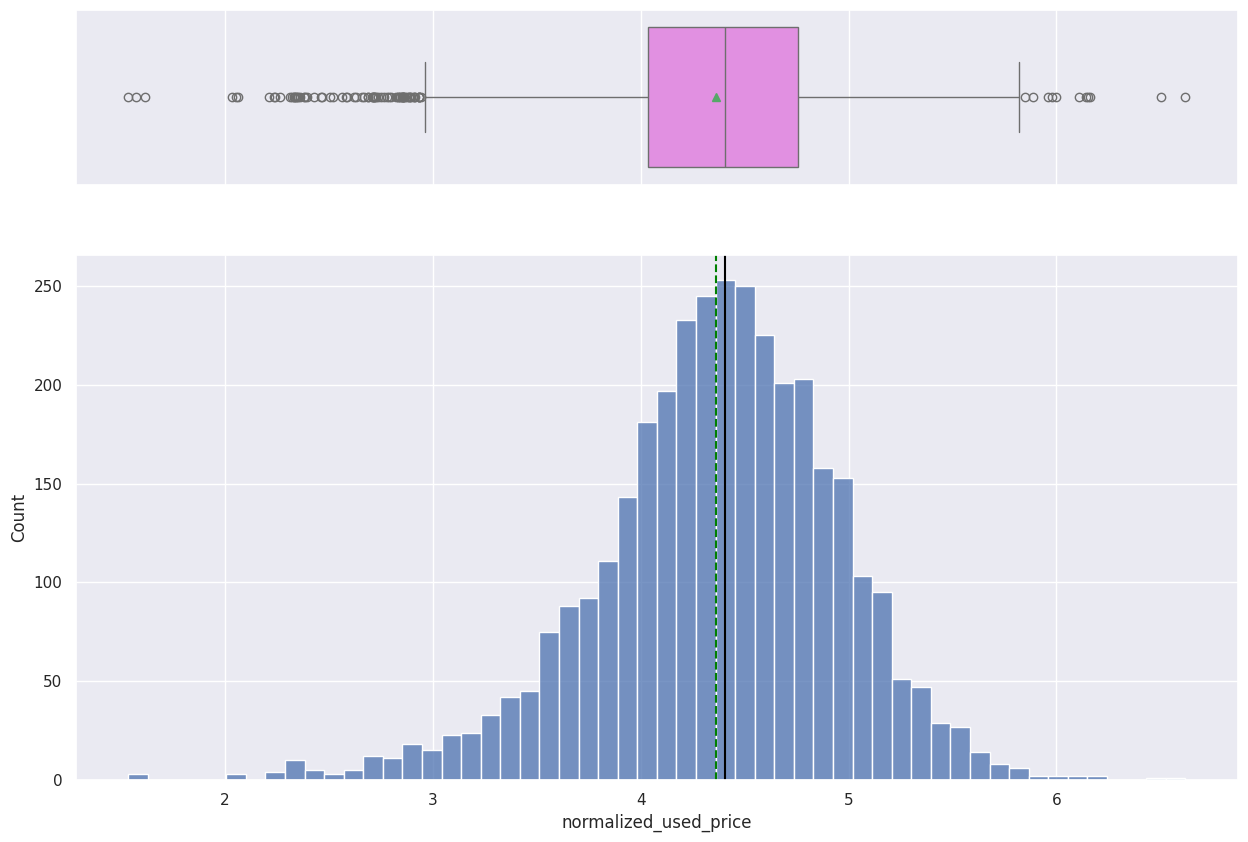

In [17]:
histogram_boxplot(df, 'normalized_used_price')

#### Observation


*  The normalized_used_price is close to normally distributed with a bell-shaped curve.
* The normalized_used_price are rated approximately 4.40 euros by average cost.




**`normalized_new_price`**



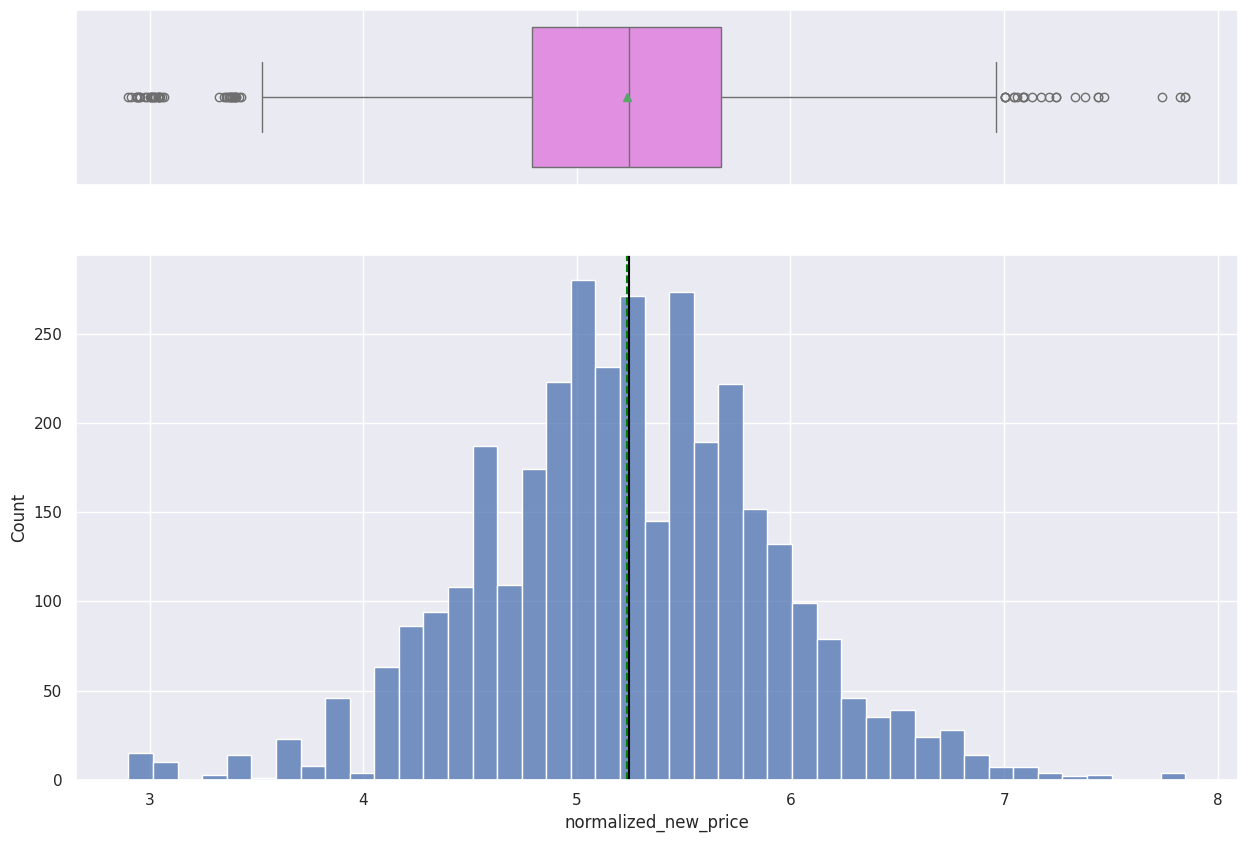

In [18]:
histogram_boxplot(df, 'normalized_new_price')

#### Observation


*  The normalized_new_price is close to normally distributed with fatter tails.
*   The normalized_new_price is rated approximately 5.24 euros by average cost.



**`screen_size`**

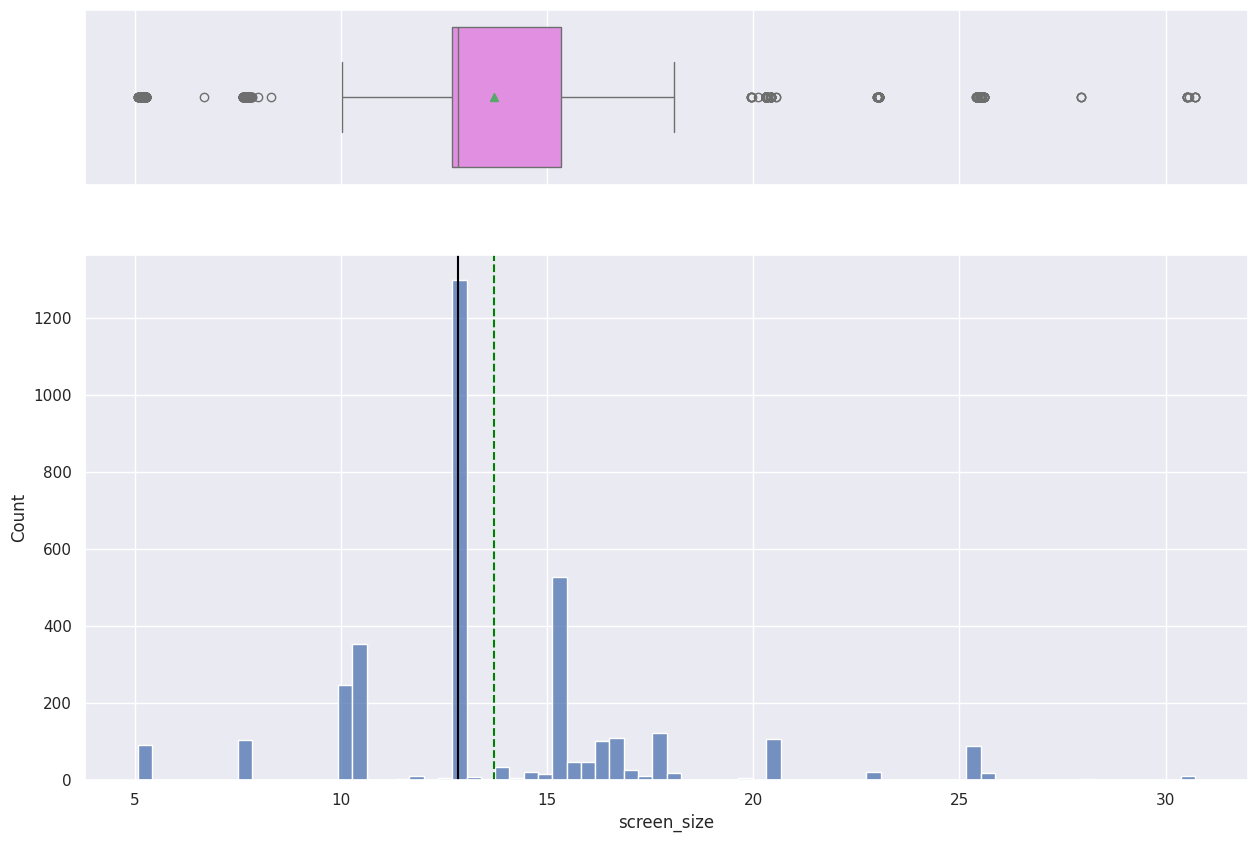

In [19]:
histogram_boxplot(df, 'screen_size')

#### Observation


*   The screen size appears to follow a normal distribution, with a sparse distribution and a peak in the middle.
*   The histogram distribution of screen sizes indicates a median of 12.83.


**`main_camera_mp`**




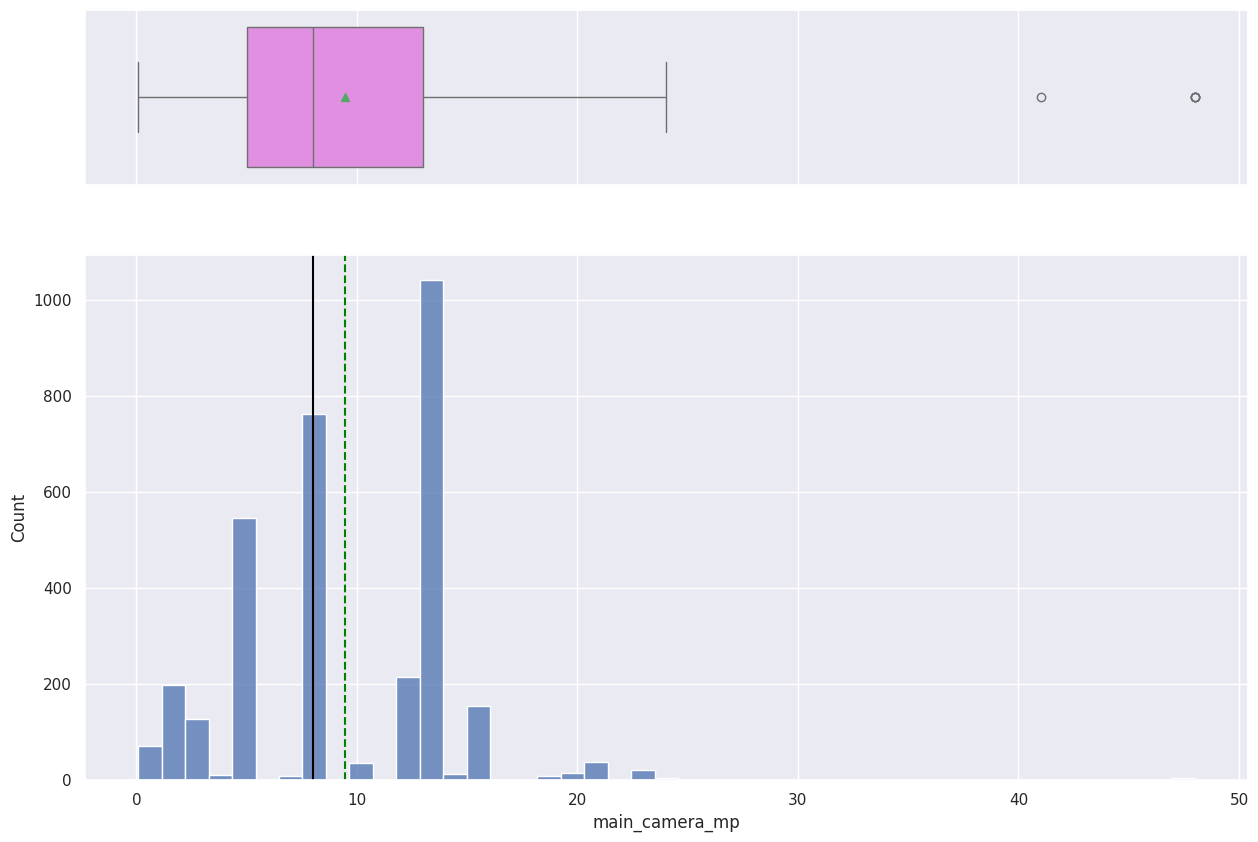

In [20]:
histogram_boxplot(df, 'main_camera_mp')

#### Observation

*   The main camera distribution in the dataset is left-skewed and sparsely distributed.
*   The meian distribution on the dataset is about 8 megapixels.





**`selfie_camera_mp`**

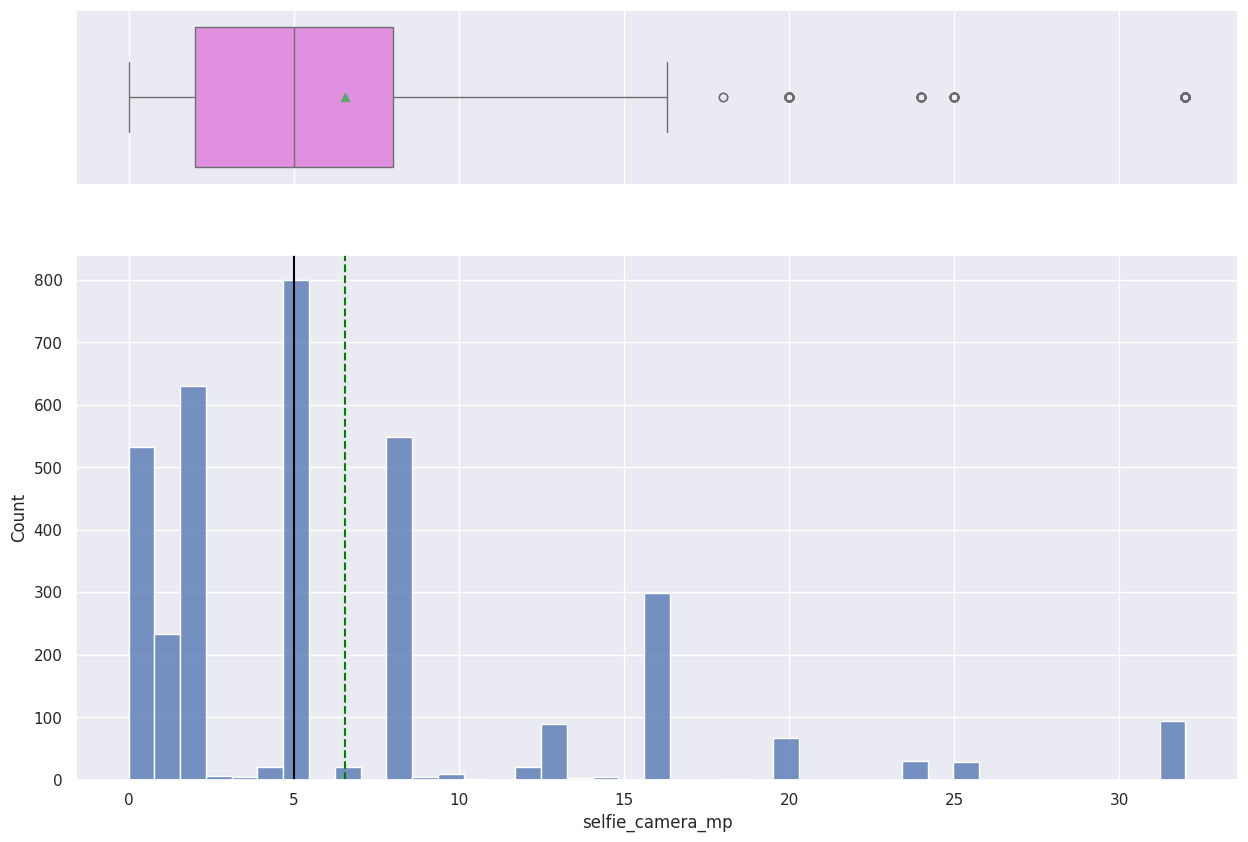

In [21]:
histogram_boxplot(df, 'selfie_camera_mp')

#### Observation



*   The selfie camera distribution in the dataset is right-skewed and sparsely distributed.
*   The histogram distribution of selfie camera indicates a median of 5 megapixels.


**`int_memory`**

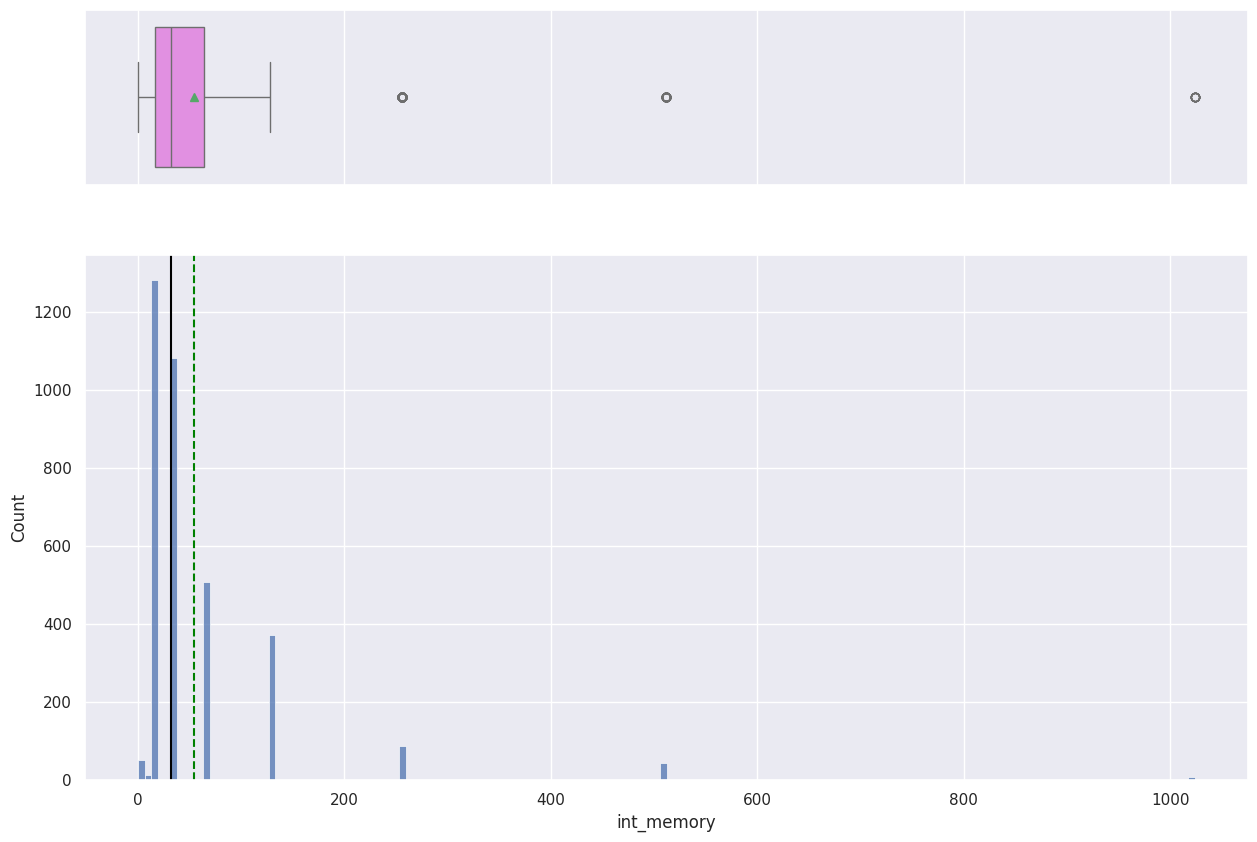

In [22]:
histogram_boxplot(df, 'int_memory')

#### Observation
*   The dataset's distribution is right-skewed, with most values concentrated toward the lower end while the rest are sparsely distributed across the higher range, indicating fewer occurrences of larger values.


**`ram`**

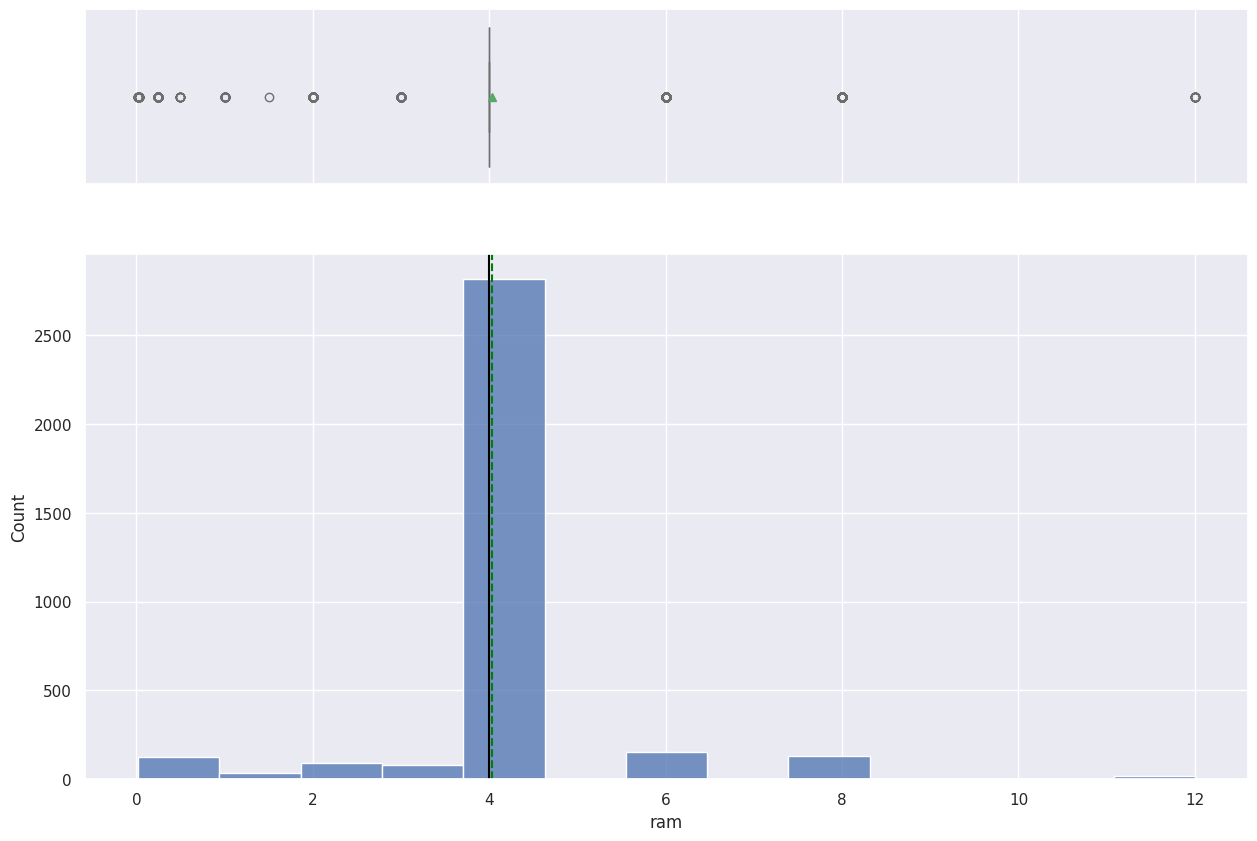

In [23]:
histogram_boxplot(df, 'ram')

#### Observation

*   The histogram of memory size shows a unimodal distribution, peaked around the median of 4 GB RAM, with flat tails at both ends, indicating that extreme values are rare and most data points are concentrated near the center.



**`weight`**

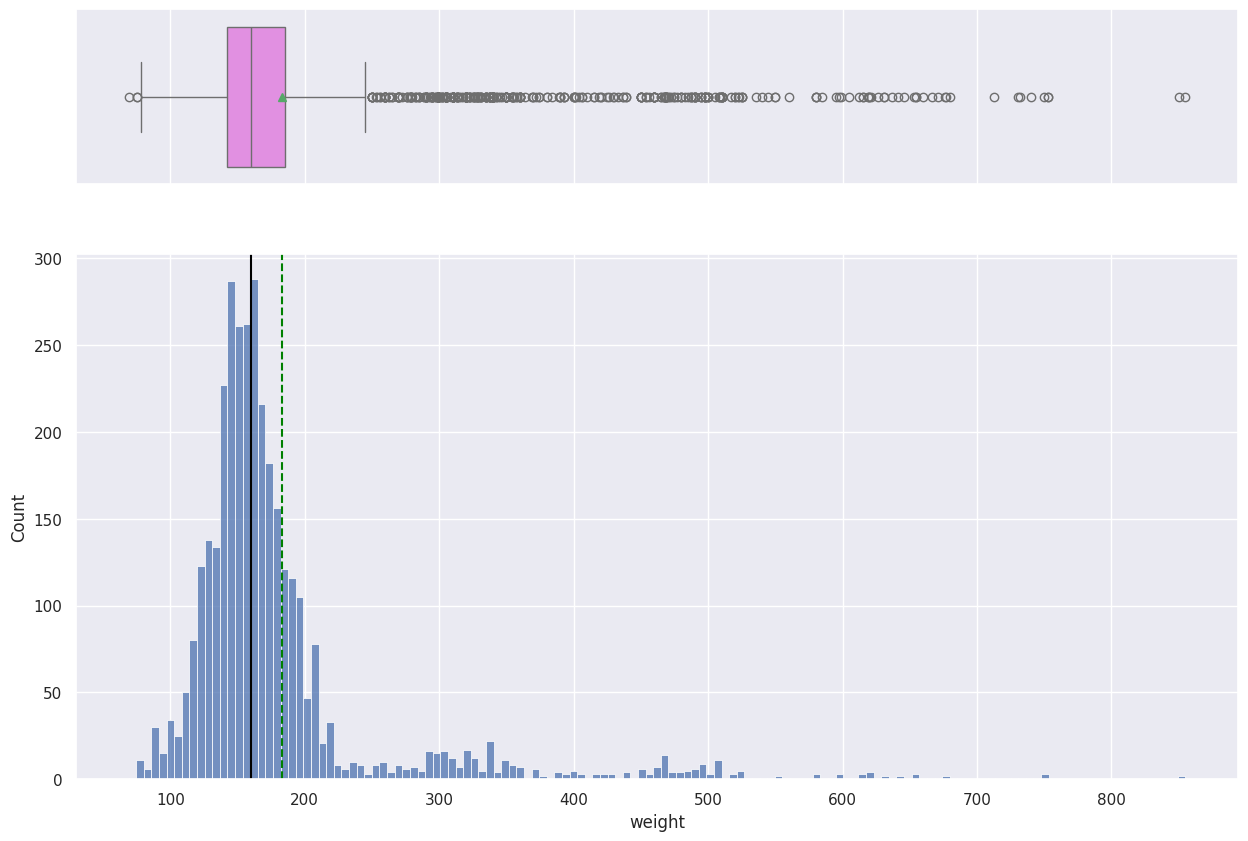

In [24]:
histogram_boxplot(df, 'weight')

#### Observation



*   The distribution is approximately normal but right-skewed, with a peak near the center and a long tail extending to the right, indicating that while most values cluster around the median, there are some larger outliers.



**`battery`**



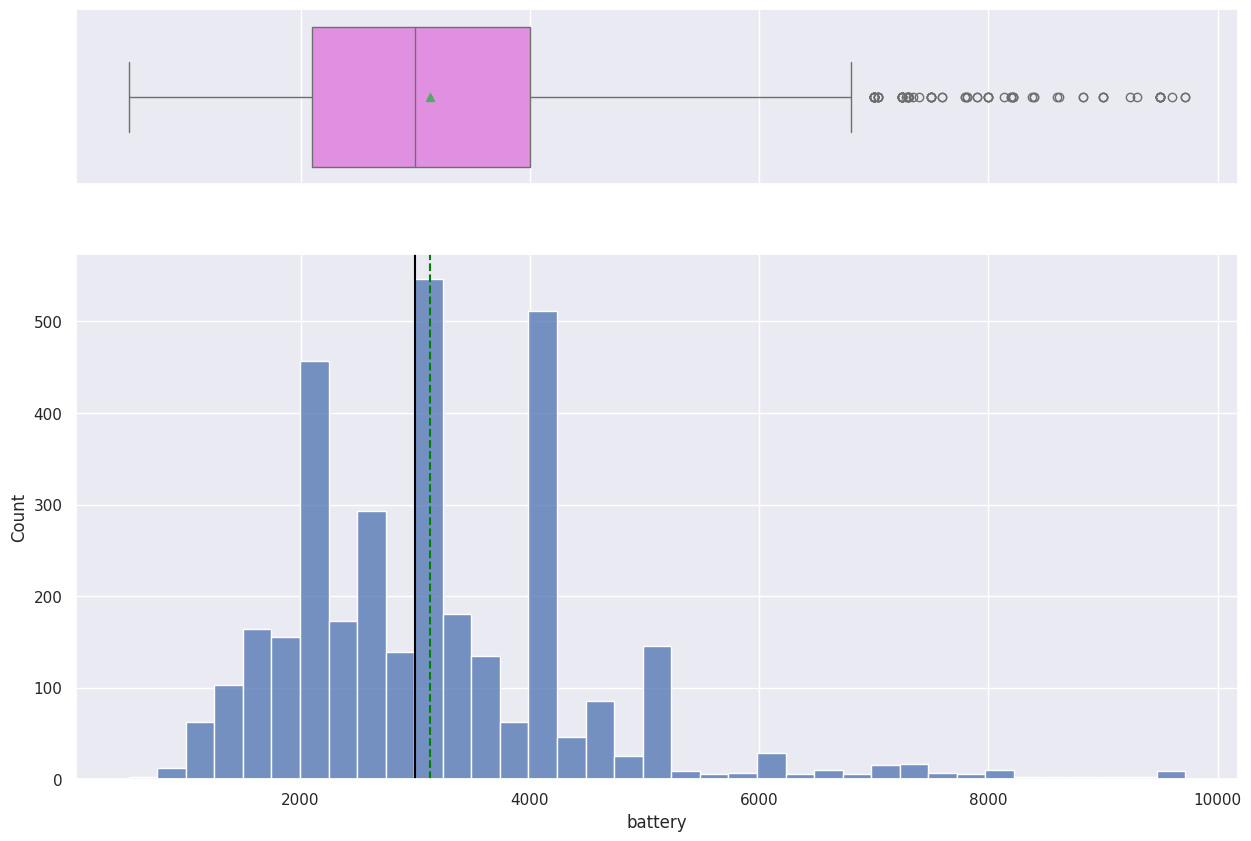

In [25]:
histogram_boxplot(df, 'battery')

#### Observation

*   The histogram shows a roughly normal distribution with a few additional peaks around the median values, suggesting a central concentration of data with some variations near the middle.

**`days_used`**

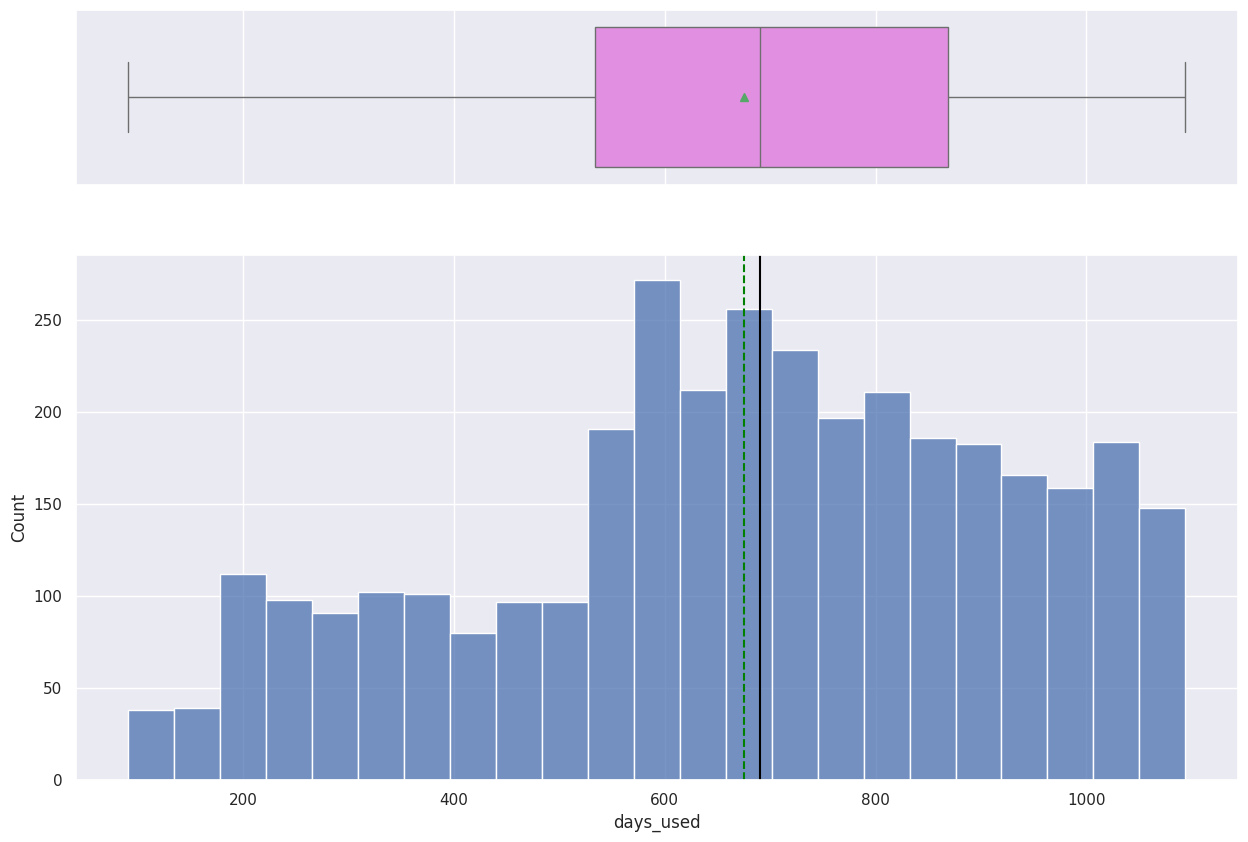

In [26]:
histogram_boxplot(df, 'days_used')

#### *Observation*



* The distribution appears nearly uniform, with a slight left skew at the tail, indicating a relatively even spread of values with a few lower-end.


**`brand_name`**

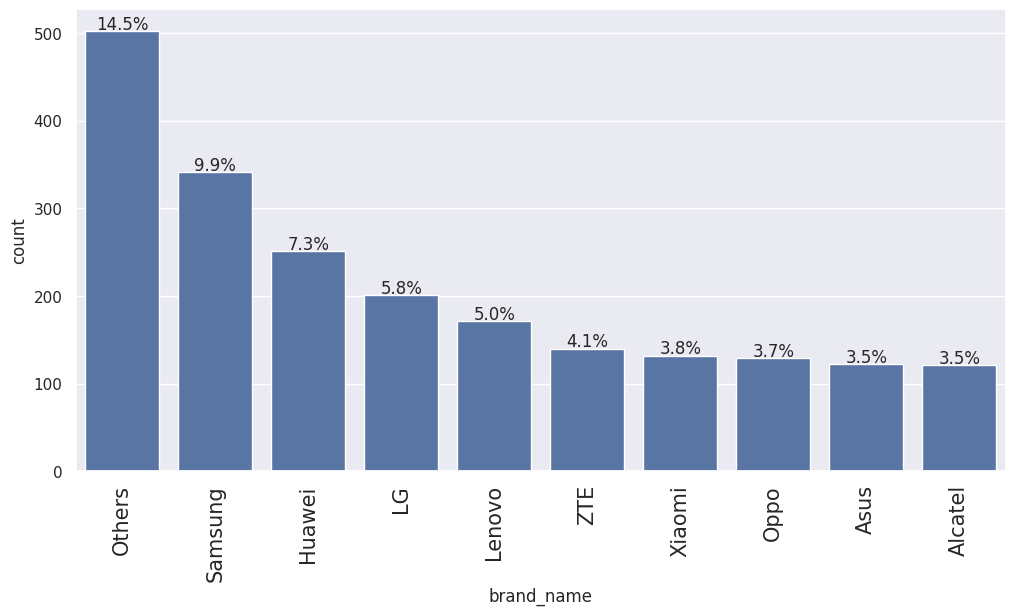

In [27]:
labeled_barplot(df, "brand_name", perc=True, n=10)

#### *Observation*


*   The bar plot shows that **"Others" and Samsung** are the most commonly used phone brands, while **Alcatel and Asus** are the least used.



**`os`**

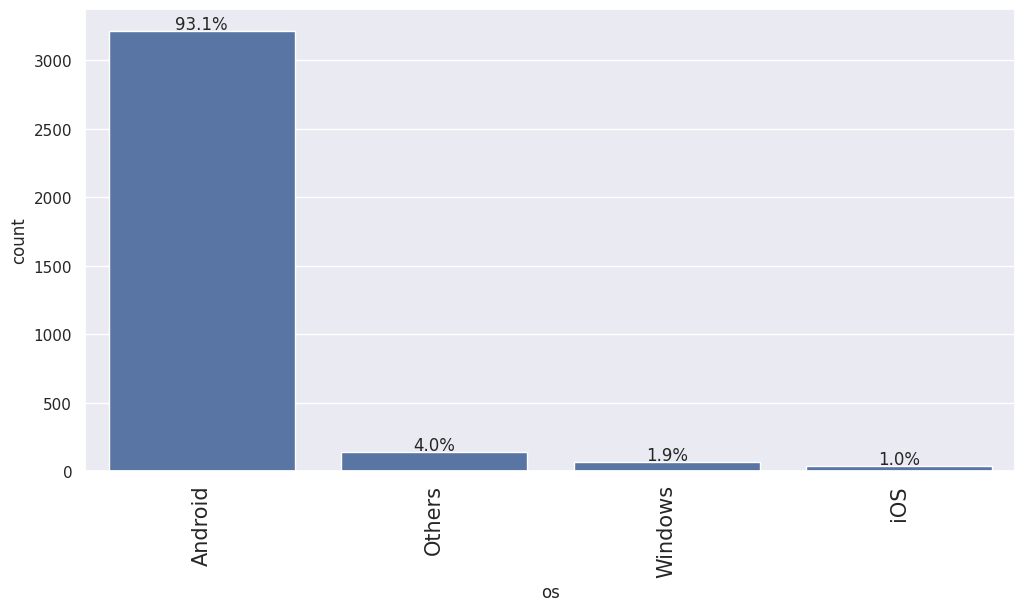

In [28]:
labeled_barplot(df, "os", perc=True, n=10)

#### *Observation*

*   The Android operating system appears to be the most widely used on phones, with a usage rate of 93.1%.




**`4g`**

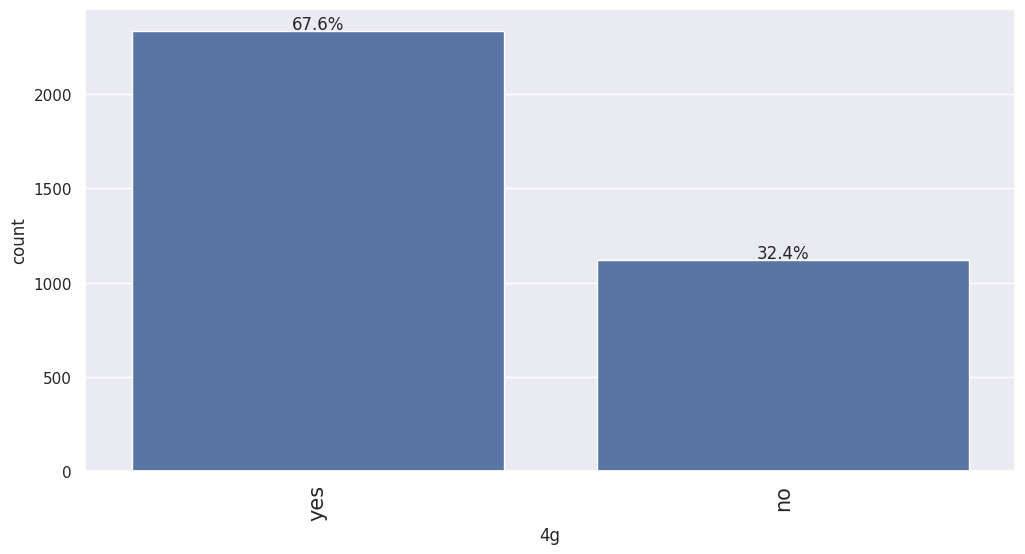

In [29]:
labeled_barplot(df, "4g", perc=True, n=10)

#### *Observation*


*  The bar plot indicates that 67.6% of the phones are 4G-enabled


**`5g`**

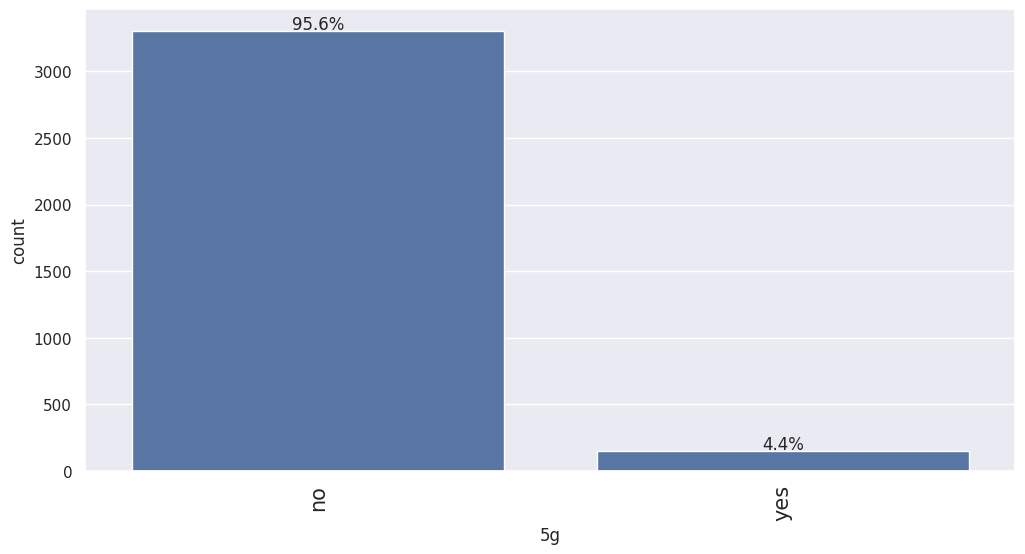

In [30]:
labeled_barplot(df, "5g", perc=True, n=10)

#### *Observation*

*   The bar plot indicates that 4.4% of the phones are 5G-enabled.





**`release_year`**

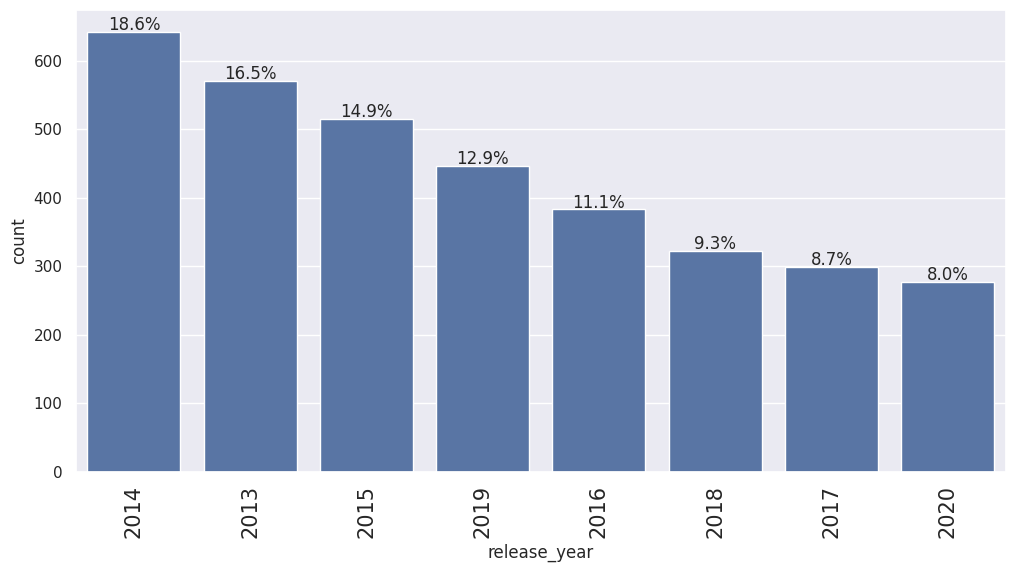

In [31]:
labeled_barplot(df, "release_year", perc=True, n=10)

#### *Observation*

*   The year with the highest number of phone releases is 2014, accounting for 18.6%, while 2020 has the fewest releases at 8.0%.



**What percentage of the used device market is dominated by Android devices?.**

In [32]:
android_percentage = (df['os'].value_counts(normalize=True) * 100)['Android']
print(f'{android_percentage:.2f}%')

93.05%


#### *Observation*

The percentage of the dominated Android used device in the market is 93.05 percent.

### Bivariate Analysis

**Correlation Check**

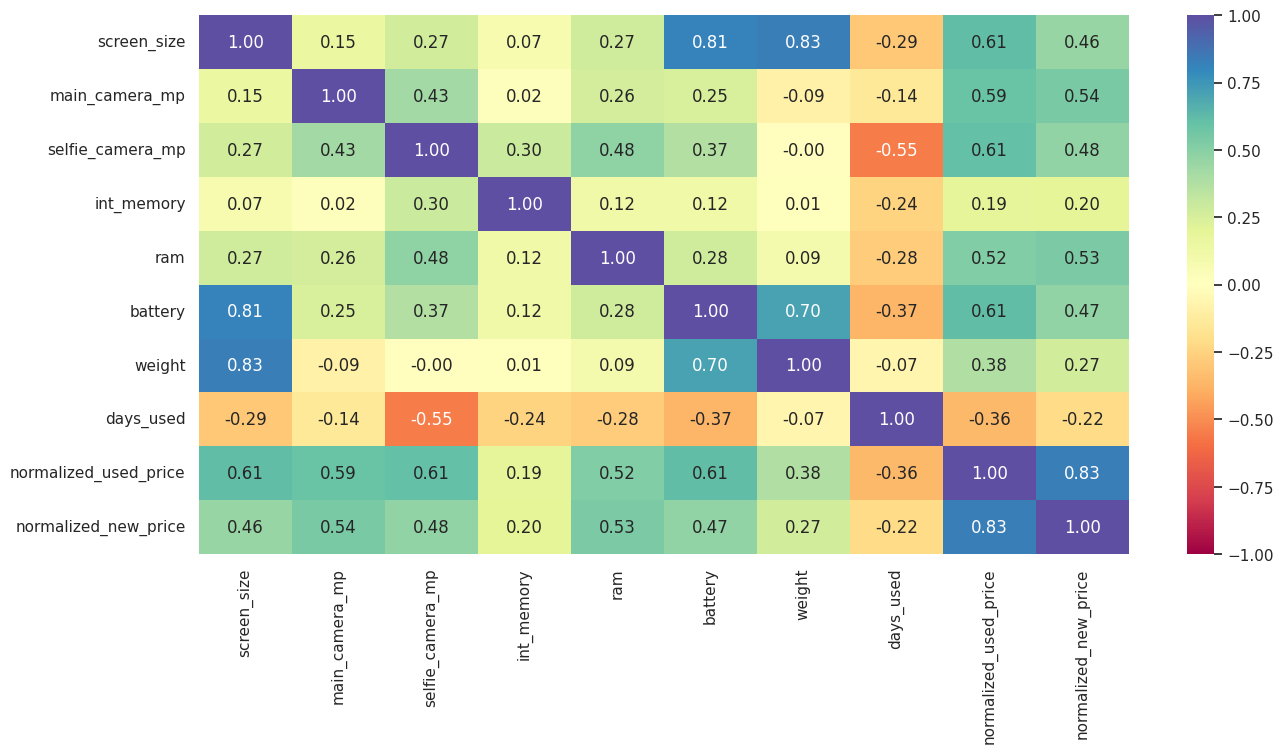

In [33]:
cols_list = df.select_dtypes(include=np.number).columns.tolist()
# dropping release_year as it is a temporal variable
cols_list.remove("release_year")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### *Observation*



*  The **screen size** of devices is highly correlated with their **weight and battery** when purchasing on the marketplace site.
*   The **used device price** and the **new device price** are also highly correlated on the marketplace sites.


**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

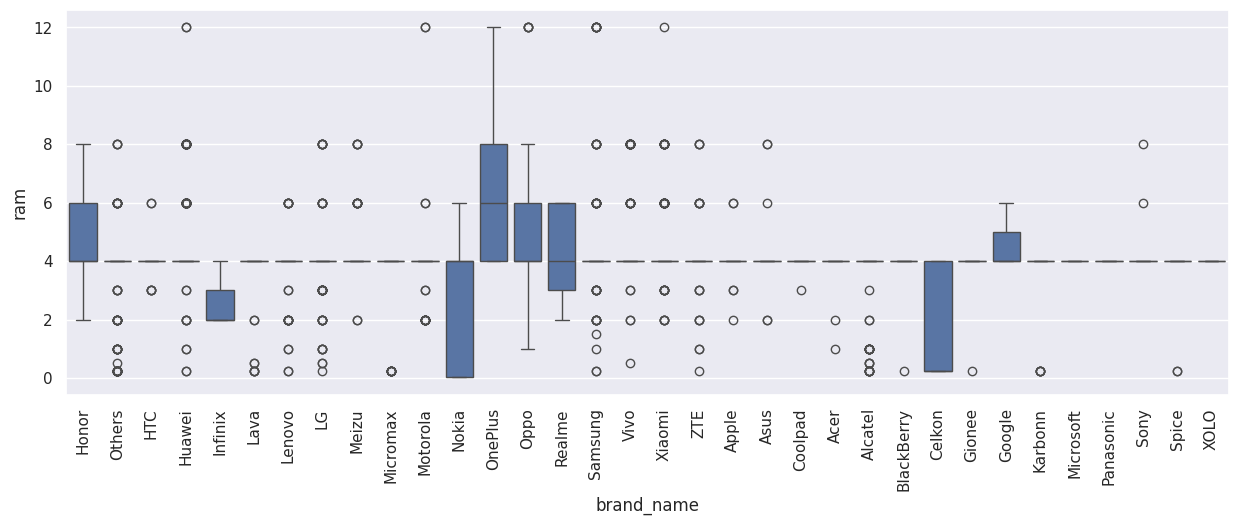

In [34]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### *Observation*

*   The highest median RAM distribution is observed in OnePlus phones, while Nokia has the lowest median RAM.



**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [35]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

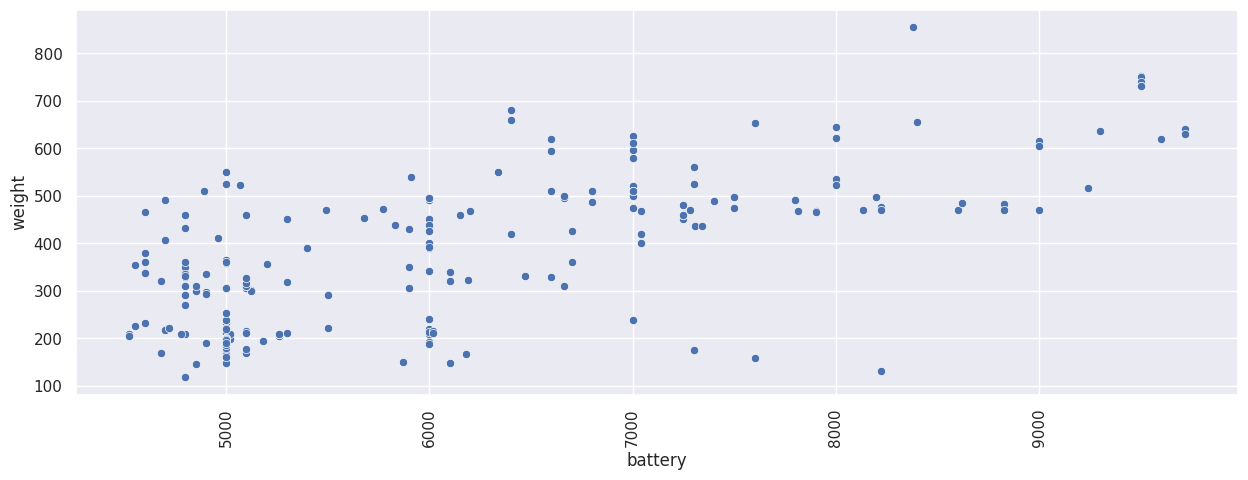

In [36]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='battery', y='weight', data=df_large_battery)
plt.xticks(rotation=90)
plt.show()

#### *Observation*

*    The scatter plot shows a positive correlation between battery capacity and weight, it reinforces the idea that larger batteries tend to add weight to devices, which could be uncomfortable for frequent travelers.



**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [37]:
df_large_screen = df[df.screen_size > 6 * 2.54]
df_large_screen.shape

(1099, 15)

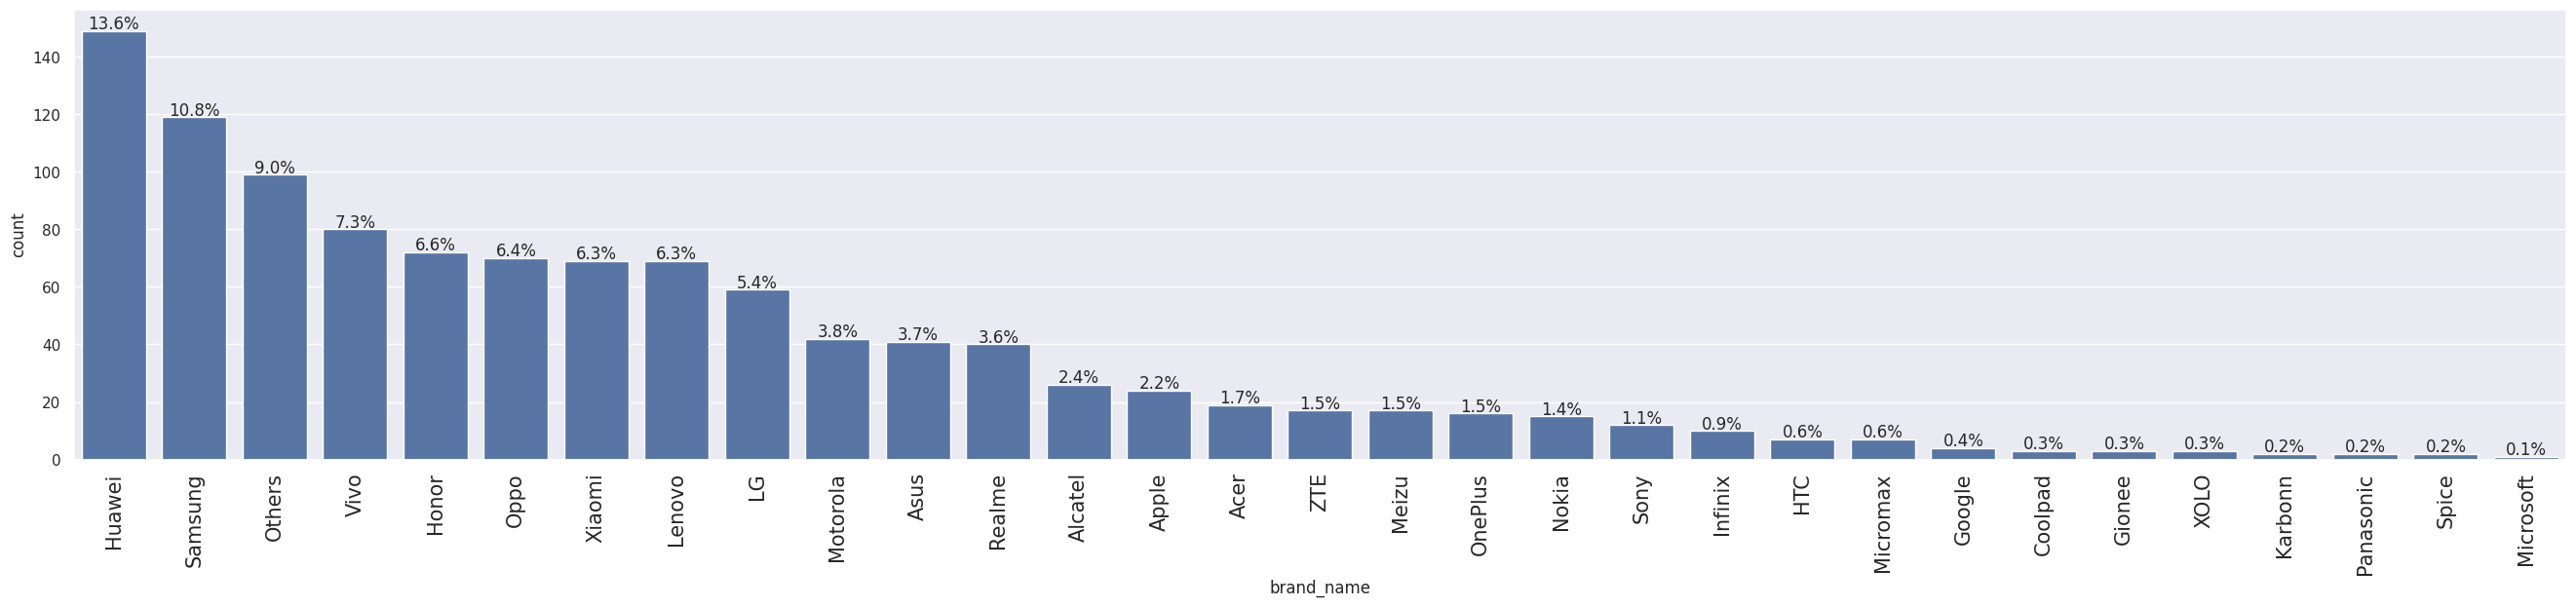

In [38]:
labeled_barplot(df_large_screen, 'brand_name', perc=True)

#### *Observation*

* The bar plot shows that Huawei has the highest percentage of phones with large screen sizes at 13.6%, while Microsoft has the lowest at 0.1%.  



**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [39]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

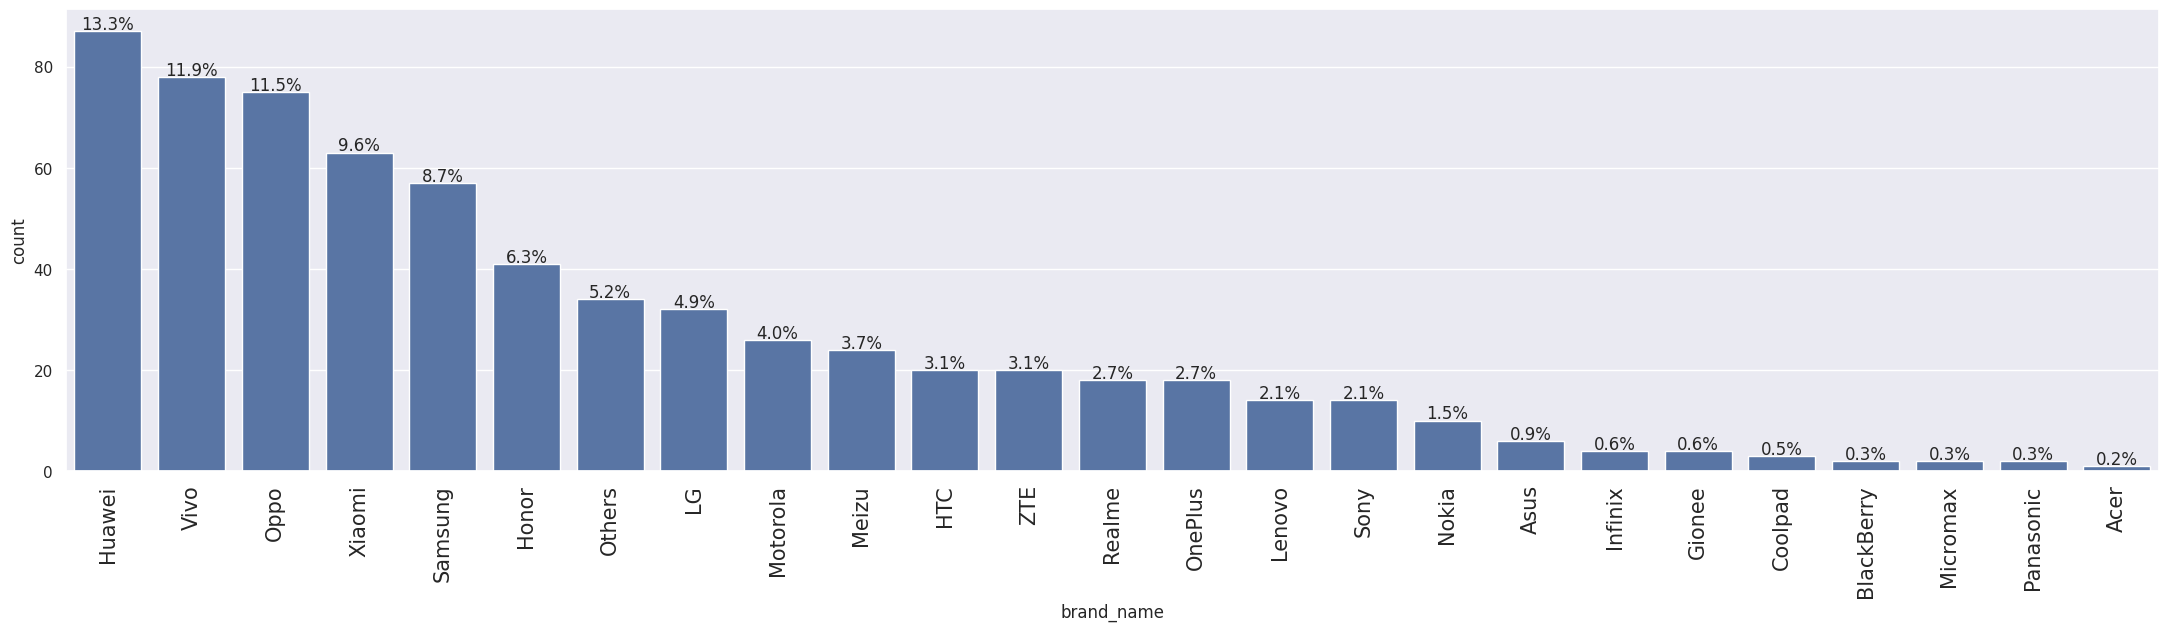

In [40]:
labeled_barplot(df_selfie_camera, 'brand_name', perc=True)

#### *Observation*

*   The bar plot indicates that Huawei phones have the highest percentage of devices with quality selfie cameras at approximately 13.3%, while Acer has the lowest at 0.2%.




**Let's do a similar analysis for rear cameras.**

- Rear cameras generally have a better resolution than front cameras, so we set the threshold higher for them at 16MP.

In [41]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

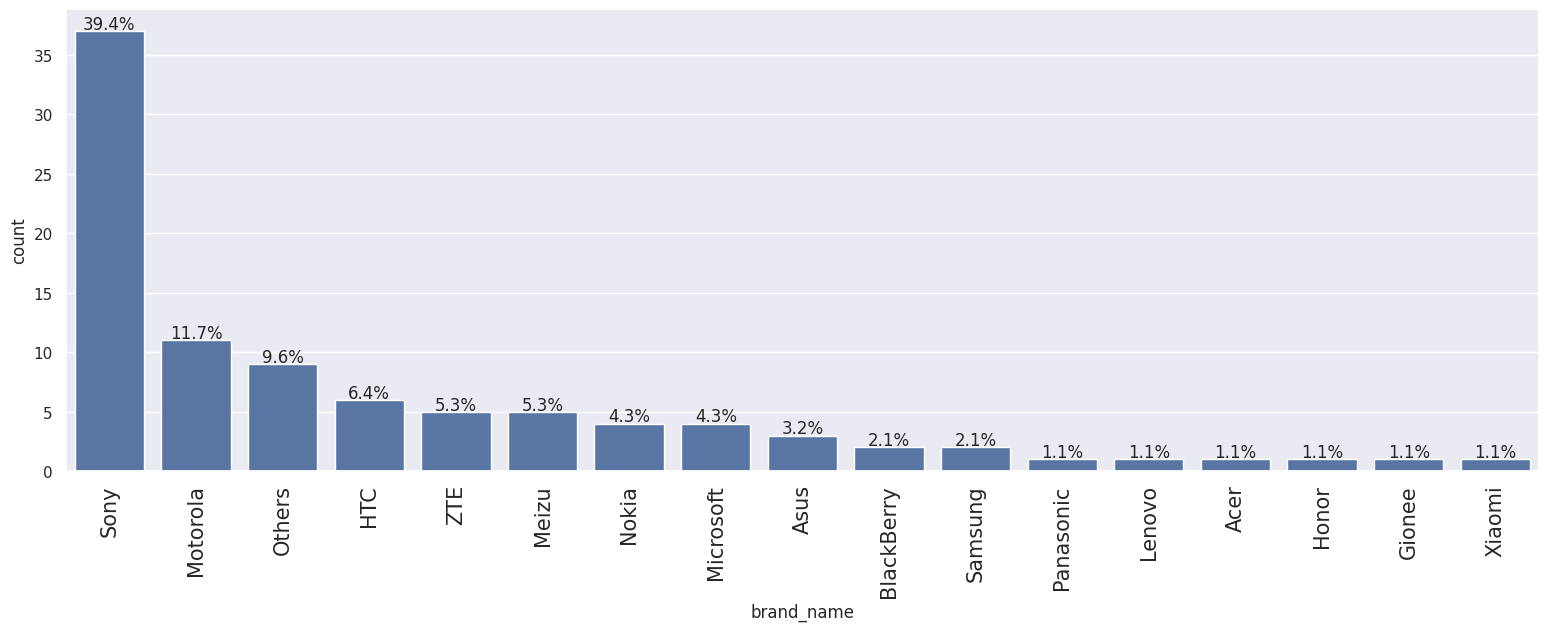

In [42]:
labeled_barplot(df_main_camera, 'brand_name', perc=True)

#### *Observation*

*  The bar plot indicates that Sony phones have the highest percentage of devices with quality main cameras at approximately 39.4%, while Panasonic, Lenovo, Acer, Honor, Gionee and Xiaomi has the lowest at 1.1%.




**Let's see how the price of used devices varies across the years.**

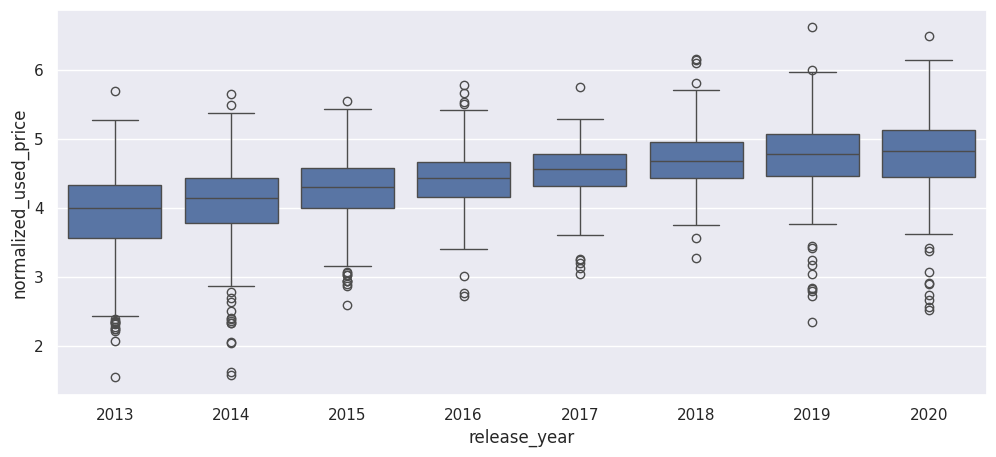

In [43]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='release_year', y='normalized_used_price', data=df)
plt.show()

#### *Observation*


*   The box plot shows a continuous growth in used phones, with variations in each year as the years progress.




**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

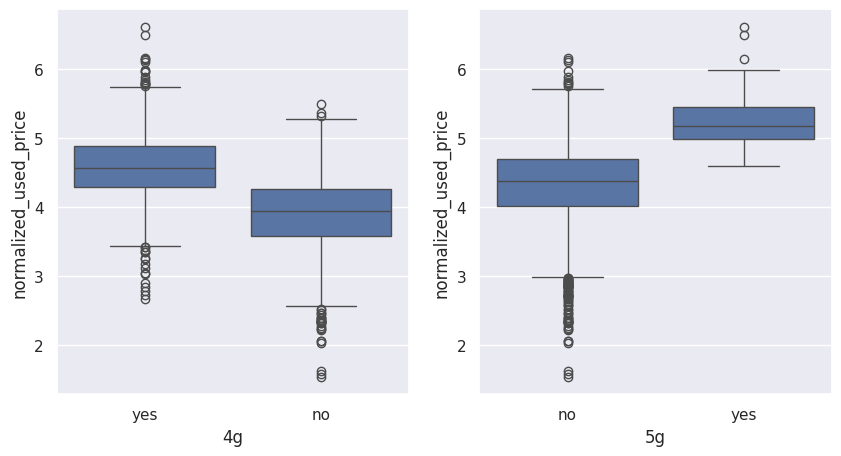

In [44]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='4g', y='normalized_used_price', data=df)

plt.subplot(1,2,2)
sns.boxplot(x='5g', y='normalized_used_price', data=df)

plt.show()

#### *Observation*

*   The box plots indicate that the distribution of used_price 5G phones is higher than that of 4G phones.





## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

### Missing Value Treatment

### Missing Value Imputation



In [45]:
# let's create a copy of the data
df1 = df.copy()

In [46]:
# missing value treatment
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,4
ram,4
battery,6


#### Observation

*   The dataset contains a significant number of missing values.



- We will impute the missing values in the data by the column medians grouped by `release_year` and `brand_name`.

In [47]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year', 'brand_name'])[col].transform("median")
    )
# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,179
selfie_camera_mp,2
int_memory,0
ram,0
battery,6


#### Observation
*   We will impute the remaining missing values in the data by the column medians grouped by `brand_name`.



In [48]:
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    )

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,10
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


#### Observation
*   We will fill the remaining missing values in the `main_camera_mp` column by the column median.








In [49]:
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum()

,0
brand_name,0
os,0
screen_size,0
4g,0
5g,0
main_camera_mp,0
selfie_camera_mp,0
int_memory,0
ram,0
battery,0


#### Observation
- All the missing values have been treated.

### Feature Engineering


- Let's create a new column `years_since_release` from the `release_year` column.
- We will consider the year of data collection, 2021, as the baseline.
- We will drop the `release_year` column.

In [50]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)
df1["years_since_release"].describe()

,years_since_release
count,3454.000000
mean,5.034742
std,2.298455
min,1.000000
25%,3.000000
50%,5.500000
75%,7.000000
max,8.000000


### Outlier Check

- Let's check for outliers in the data.

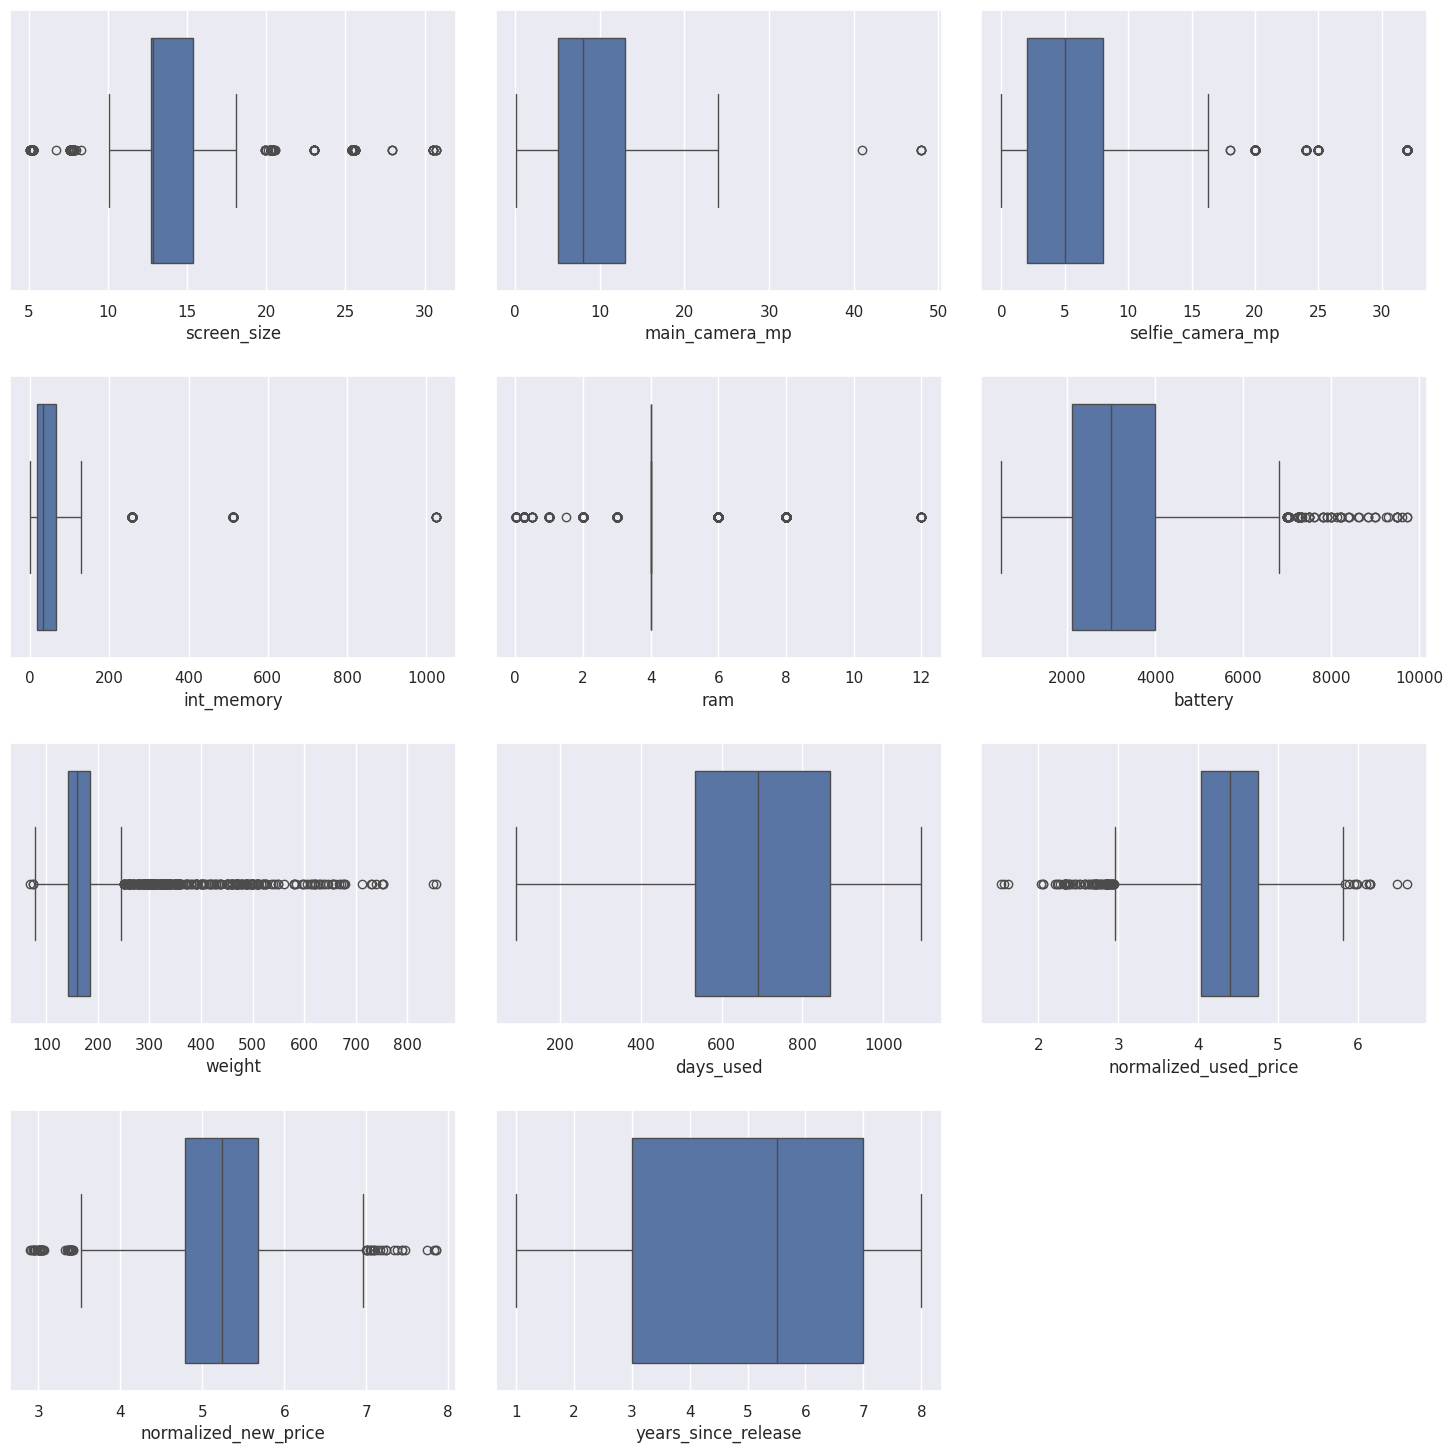

In [51]:
# outlier detection using boxplot
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=df1, x=variable)
    plt.tight_layout(pad=2)

plt.show()

#### Observation

- There are quite are outliers in the dataset.
- However, we will not treat them as they are proper values.

### Data Preparation for modeling

- We want to predict the normalized price of used devices
- Before we proceed to build a model, we'll have to encode categorical features
- We'll split the data into train and test to be able to evaluate the model that we build on the train data
- We will build a Linear Regression model using the train data and then check it's performance

In [52]:
# Define the dependent and independent variables
X = df1.drop(['normalized_used_price'], axis=1)
y = df1['normalized_used_price']

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [53]:
# let's add the intercept to data
X = sm.add_constant(X)

In [54]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) ## create dummies for independent features
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,False,False,False,False,False,False,False,False,True,False
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,False,False,False,False,False,False,False,False,True,True
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,False,False,False,False,False,False,False,False,True,True
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,False,False,False,False,False,False,False,False,True,True
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,False,False,False,False,False,False,False,False,True,False


In [55]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127.0,4.715100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325.0,5.519018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162.0,5.884631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345.0,5.630961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293.0,4.947837,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [57]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA


*   It is a good idea to explore the data once again after manipulating it.




### Bivariate Analysis

**Correlation Check**

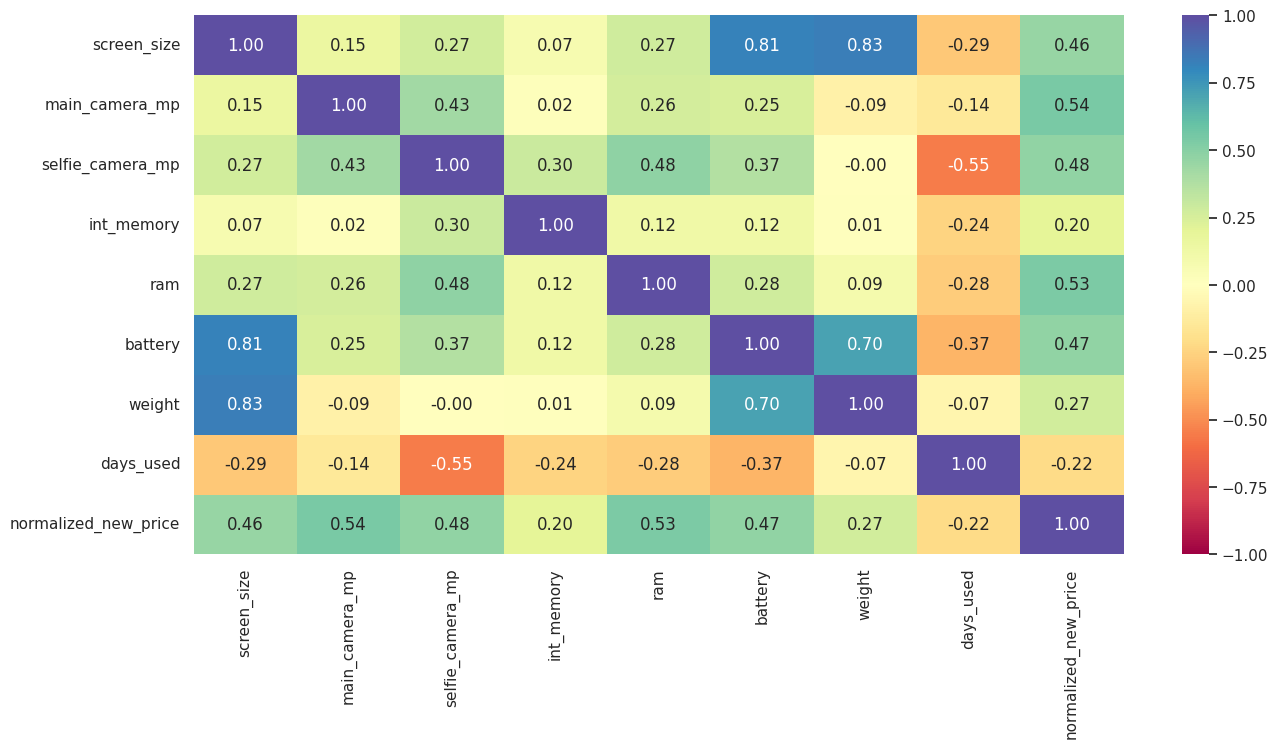

In [58]:
cols_list = df1.select_dtypes(include=np.number).columns.tolist()
# dropping years_since_release and "normalized_used_price" as it is a temporal variable
cols_list.remove("years_since_release")
cols_list.remove("normalized_used_price")

plt.figure(figsize=(15, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observation


*   After data processing on the marketplace site, the screen size of devices shows a strong correlation with both their weight and battery capacity when making purchasing decisions.







**The amount of RAM is important for the smooth functioning of a device. Let's see how the amount of RAM varies across brands.**

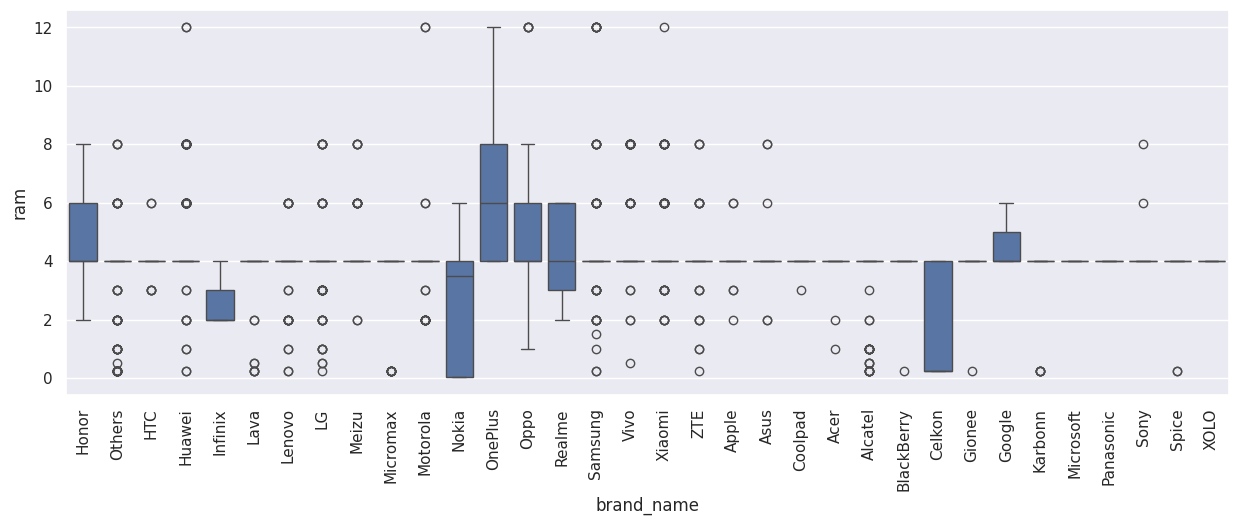

In [59]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=df1, x="brand_name", y="ram")
plt.xticks(rotation=90)
plt.show()

#### Observation

*    After data processing, OnePlus phones still exhibit the highest median RAM distribution, whereas Nokia phones have the lowest median RAM.



**People who travel frequently require devices with large batteries to run through the day. But large battery often increases weight, making it feel uncomfortable in the hands. Let's create a new dataframe of only those devices which offer a large battery and analyze.**

In [60]:
df1_large_battery = df1[df1.battery > 4500]
df1_large_battery.shape

(341, 15)

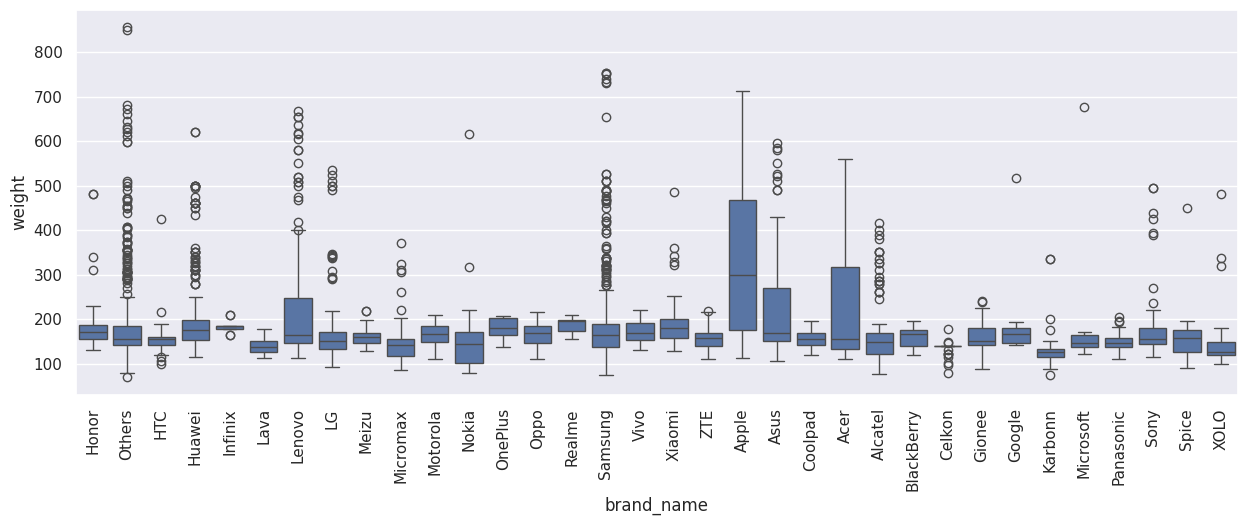

In [61]:
plt.figure(figsize=(15, 5))
sns.boxplot(x='brand_name', y='weight', data=df1) # Pass 'brand_name' and 'weight' as keyword arguments
plt.xticks(rotation=90)
plt.show()

#### Observation

*   After data processing, Apple stands out as the brand with the heaviest phones, weighing over 450 grams, while the majority of other phones weigh below 200 grams.




**People who buy phones and tablets primarily for entertainment purposes prefer a large screen as they offer a better viewing experience. Let's create a new dataframe of only those devices which are suitable for such people and analyze.**

In [62]:
df1_large_screen = df1[df1.screen_size > 6 * 2.54]
df1_large_screen.shape

(1099, 15)

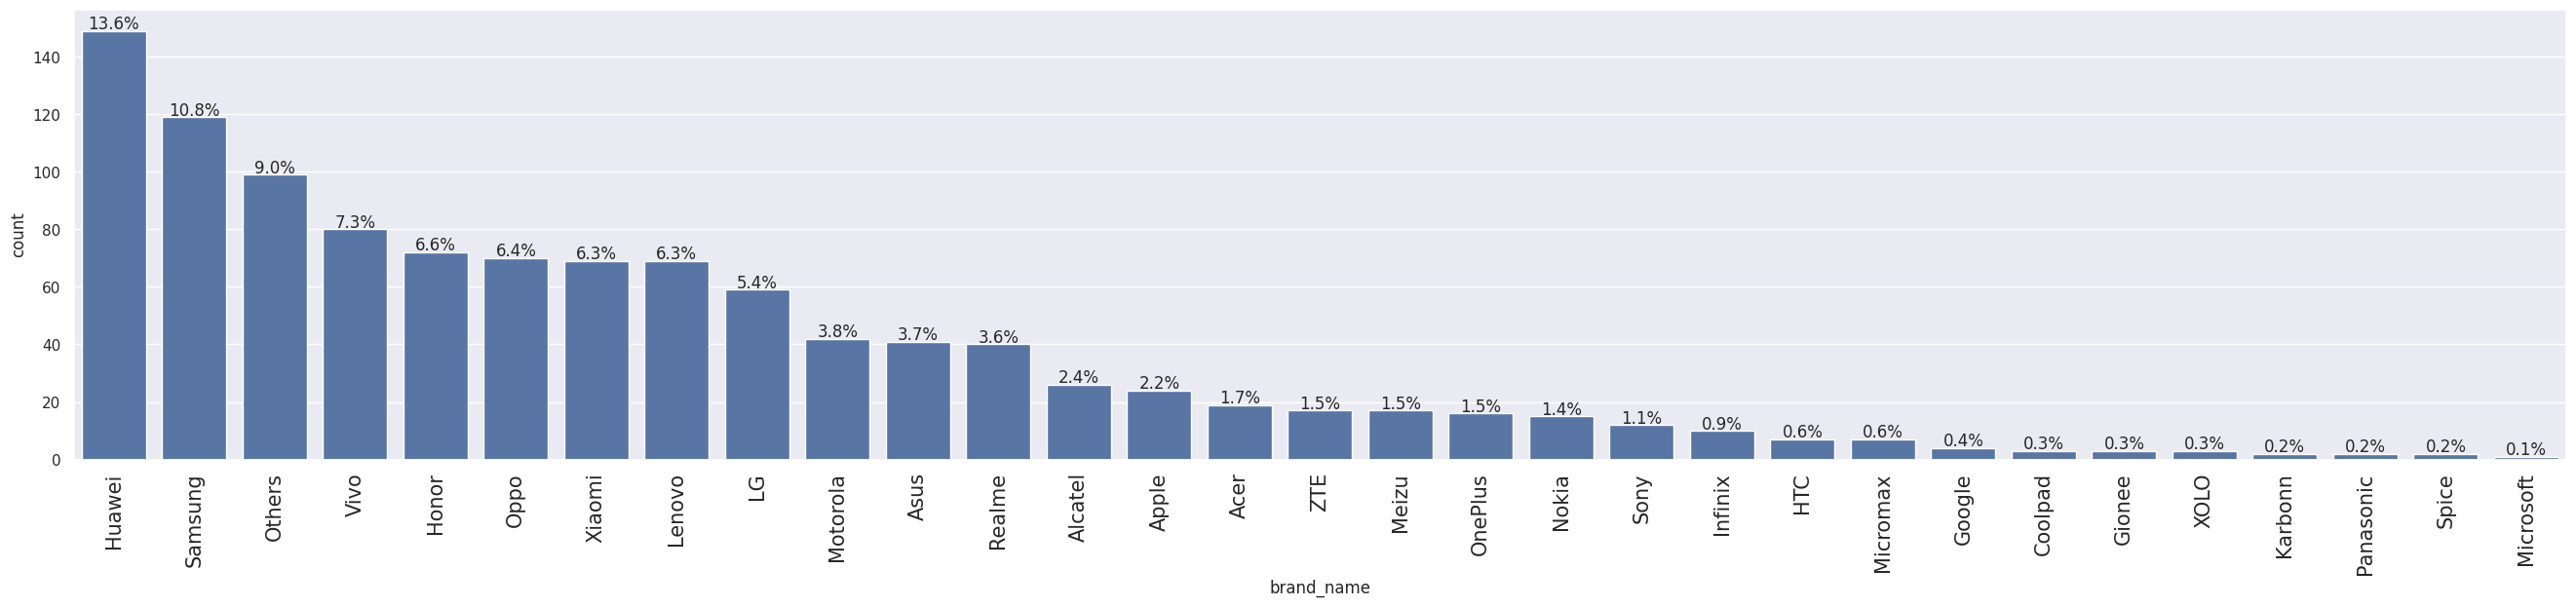

In [63]:
labeled_barplot(df1_large_screen, 'brand_name', perc=True) # Pass the DataFrame, not the DataFrame.shape

#### Observation

* After data processing, Huawei remains the leading brand with a screen size share of 13.6%, while Microsoft holds a minimal share of 0.1%.



**Everyone likes a good camera to capture their favorite moments with loved ones. Some customers specifically look for good front cameras to click cool selfies. Let's create a new dataframe of only those devices which are suitable for this customer segment and analyze.**

In [64]:
df1_selfie_camera = df1[df1.selfie_camera_mp > 8]
df1_selfie_camera.shape

(655, 15)

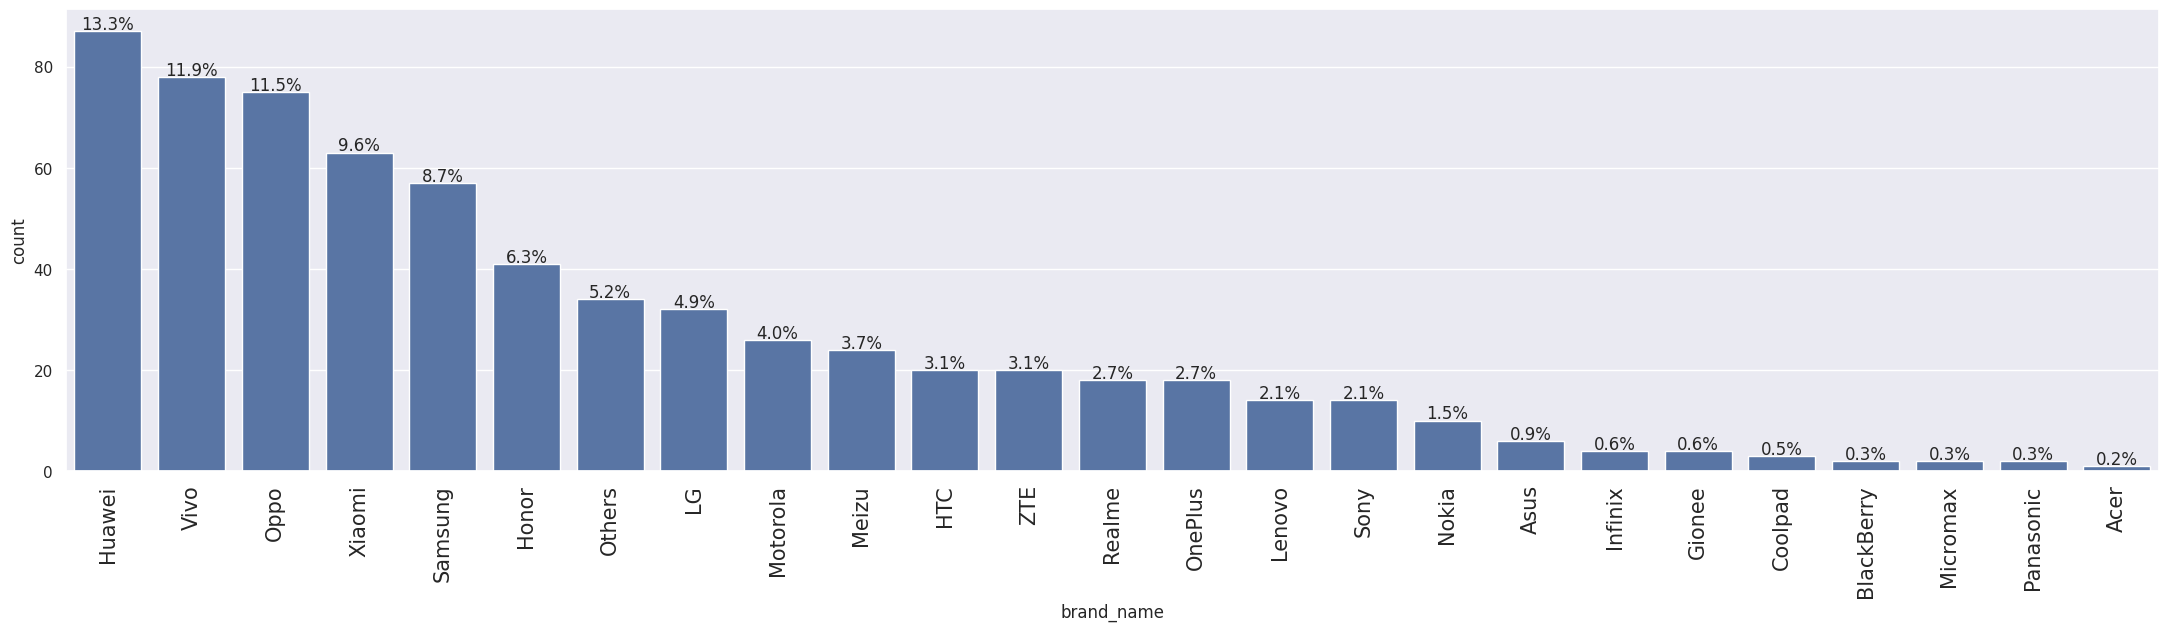

In [65]:
labeled_barplot(df1_selfie_camera, 'brand_name', perc=True) # Pass the DataFrame, not the DataFrame.shape

#### Observation

*  After data processing, Huawei continues to lead in selfie camera quality with a share of 13.3%, while Acer ranks the lowest with just 0.2%



In [66]:
df1_main_camera = df1[df1.main_camera_mp > 16]
df1_main_camera.shape

(94, 15)

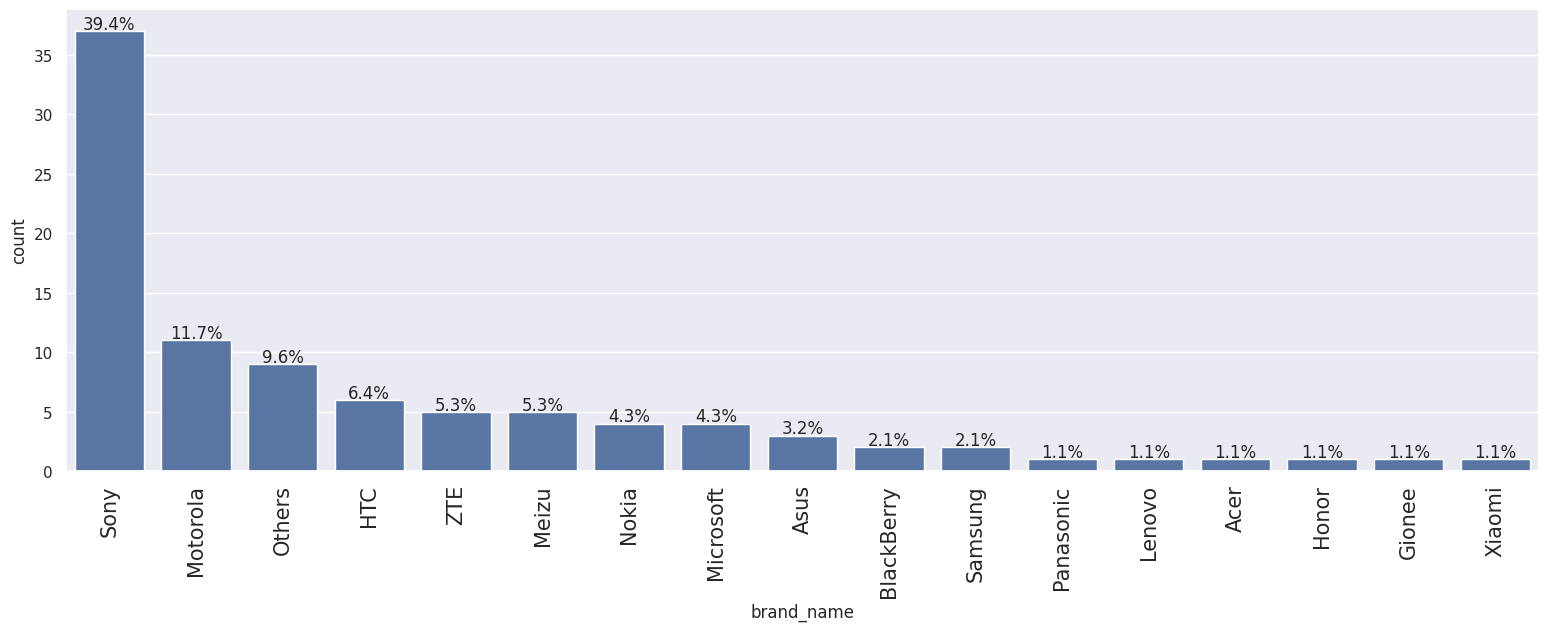

In [67]:
labeled_barplot(df1_main_camera, 'brand_name', perc=True) # Pass the DataFrame, not the DataFrame.shape

#### Observation

*  After data processing, Sony remains the top brand for main camera quality with a share of 39.4%, while Acer, Honor, Gionee, and Xiaomi each have the lowest quality, at just 0.1%.











**Let's see how the price of used devices varies across the years.**

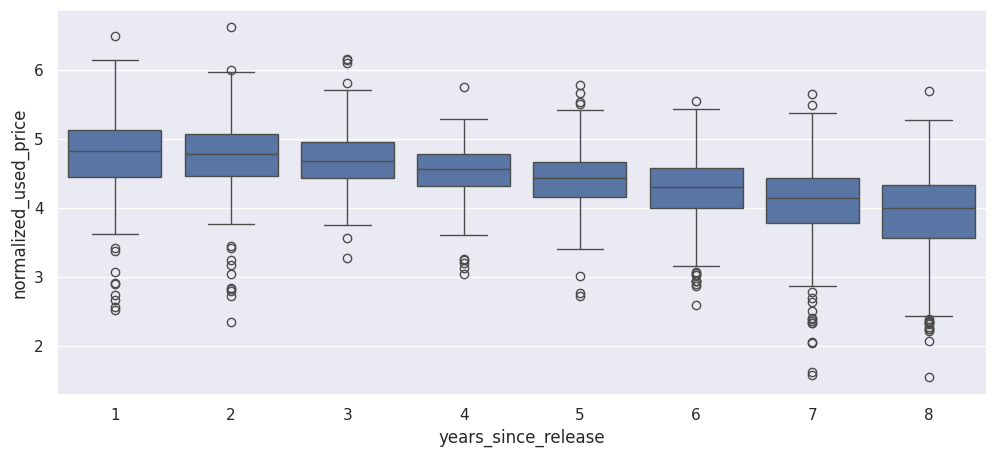

In [68]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='years_since_release', y='normalized_used_price', data=df1)
plt.show()

#### Observation

*  After data processing, the price of used phones tends to decrease as their year of release increases.




**Let's check how the prices vary for used phones and tablets offering 4G and 5G networks.**

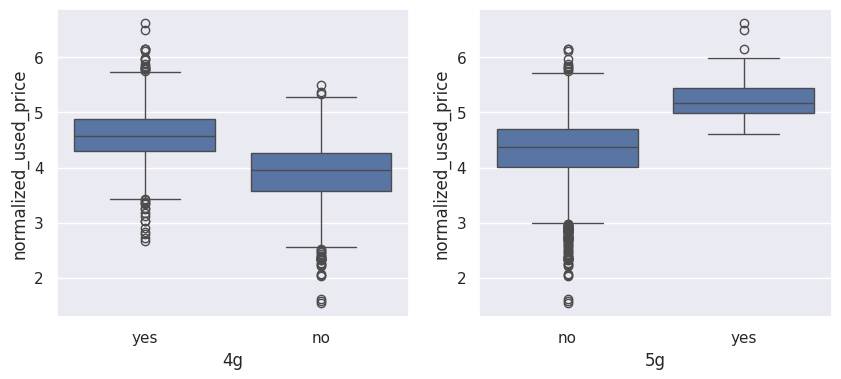

In [69]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
sns.boxplot(data=df1, x="4g", y="normalized_used_price")

plt.subplot(122)
sns.boxplot(data=df1, x="5g", y="normalized_used_price")

plt.show()

#### Observation

*  After data processing, the average price of used 4G phones is 4.5 Euros, while used 5G phones are priced higher, averaging 5.2 Euros.




## Model Building - Linear Regression

In [70]:
# Now try fitting the model again
olsmodel1 = sm.OLS(y_train, x_train).fit()
print(olsmodel1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                           13:26:31   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.842**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **1.3156**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `screen_size` is **0.0244**.

## Model Performance Check

**Let's check the performance of the model using different metrics.**

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.    
* We will create a function which will print out all the above metrics in one go.

In [71]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [72]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [73]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel1_test_perf= model_performance_regression(olsmodel1, x_test, y_test)
olsmodel1_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


#### Observation

- The training $R^2$ is 0.84, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict used phone/tablet within a mean error of 0.18 on the test data

- MAPE of 4.50 on the test data means that we are able to predict within 4.50% of the used phone/tablet.

## Checking Linear Regression Assumptions

- In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR MULTICOLLINEARITY

- We will test for multicollinearity using VIF.

- **General Rule of thumb**:
    - If VIF is 1 then there is no correlation between the $k$th predictor and the remaining predictor variables.
    - If VIF exceeds 5 or is close to exceeding 5, we say there is moderate multicollinearity.
    - If VIF is 10 or exceeding 10, it shows signs of high multicollinearity.

In [74]:
#Let's define a function to check VIF.

def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [75]:
checking_vif(x_train).sort_values(by="VIF", ascending=False)

,feature,VIF
0,const,227.744081
12,brand_name_Apple,13.057668
46,os_iOS,11.784684
34,brand_name_Others,9.711034
1,screen_size,7.677290
37,brand_name_Samsung,7.539866
7,weight,6.396749
21,brand_name_Huawei,5.983852
10,years_since_release,4.899007
24,brand_name_LG,4.849832


#### Observation

* There are multiple columns with high VIF values, indicating presence of moderate multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values on the constant (intercept)



### Removing Multicollinearity (if needed)



To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [76]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [77]:
col_list = ['screen_size',  'weight']

res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


In [78]:
col_to_drop = 'weight'
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  weight


,feature,VIF
0,const,208.983030
1,screen_size,3.593184
2,main_camera_mp,2.188817
3,selfie_camera_mp,2.787946
4,int_memory,1.364018
5,ram,2.280390
6,battery,3.681135
7,days_used,2.648280
8,normalized_new_price,3.116297
9,years_since_release,4.726722


#### Observation

* We have dealt with multicollinearity in the data
* Let's rebuild the model using the updated set of predictors variables

In [79]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.841
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.0
Date:                   Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                           13:27:36   Log-Likelihood:                 95.629
No. Observations:                   2417   AIC:                            -95.26
Df Residuals:                       2369   BIC:                             182.7
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

#### Observation
- We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dropping high p-value variables (if needed)

- We will drop the predictor variables having a p-value greater than 0.05 as they do not significantly impact the target variable.
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once.
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value.
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value.
    - Repeat the above two steps till there are no columns with p-value > 0.05.

The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [80]:
# initial list of columns
predictors = x_train2.copy()  ## Check for p-values on the right dataset
cols = predictors.columns.tolist()


# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'days_used', 'normalized_new_price', 'years_since_release', 'brand_name_Lenovo', 'brand_name_Nokia', 'brand_name_Xiaomi', '4g_yes']


In [81]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [82]:
olsmodel2 = sm.OLS(y_train, x_train3).fit()
print(olsmodel2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                           13:27:53   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [83]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train3, y_train)
olsmodel2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233989,0.183177,0.839296,0.838494,4.392265


In [84]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test3, y_test)
olsmodel2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238554,0.185,0.84222,0.840371,4.500963


#### Observation
* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward.
* Now adjusted R-squared is 0.838, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.838
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

**Now we'll check the rest of the assumptions on *olsmod2*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

### TEST FOR LINEARITY AND INDEPENDENCE

- We will test for linearity and independence by making a plot of fitted values vs residuals and checking for patterns.
- If there is no pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.

In [85]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmodel2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmodel2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.858599,0.228888
1525,4.448399,4.613833,-0.165434
1128,4.315353,4.277568,0.037785
3003,4.282068,4.252225,0.029844
2907,4.456438,4.440283,0.016156


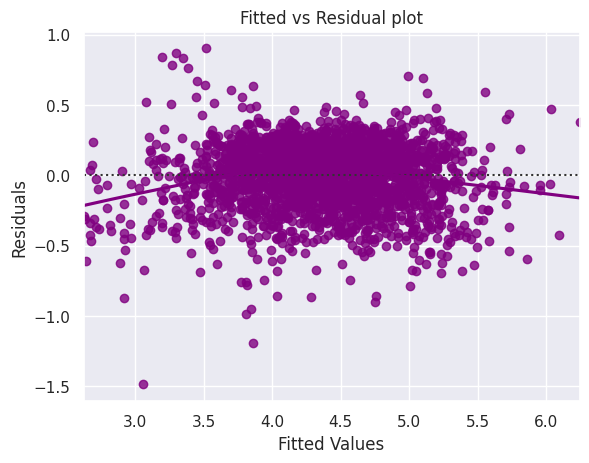

In [86]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

#### Observation
* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY


1.  We will test for normality by checking the distribution of residuals, by checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

Shapiro-Wilk test:

*  Null hypothesis: Residuals are normally distributed
*  Alternate hypothesis: Residuals are not normally distributed


2.   If the residuals follow a normal distribution, they will make a straight line plot, otherwise not.

2.  If the p-value of the Shapiro-Wilk test is greater than 0.05, we can say the residuals are normally distributed.


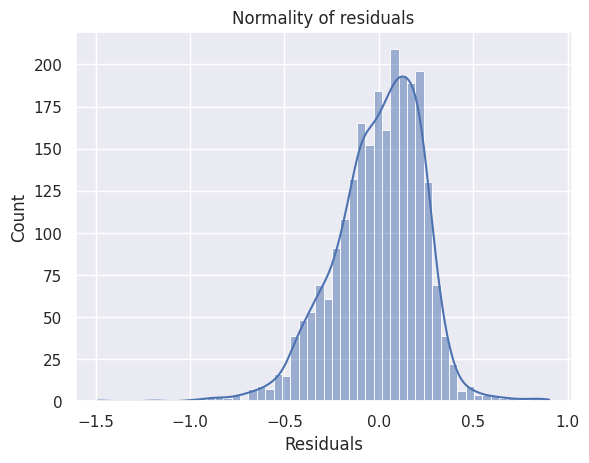

In [87]:
sns.histplot(data=df_pred, x='Residuals', kde=True) # Change x to 'Residuals'
plt.title("Normality of residuals")
plt.show()

#### Observation

- The histogram of residuals generally follows a normal distribution but shows a leftward skew in the tails.
- Let's check the Q-Q plot.

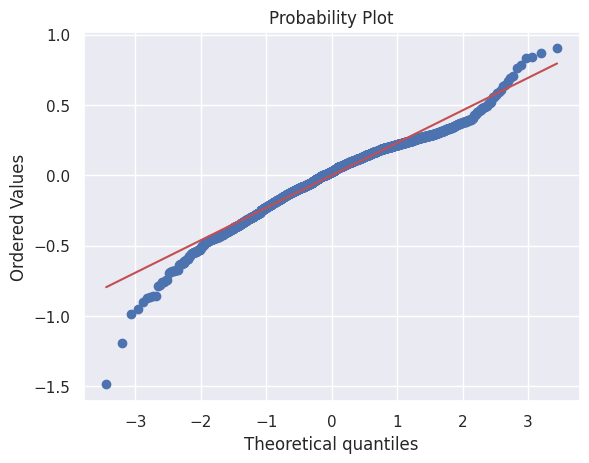

In [88]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred['Residuals'], dist="norm", plot=pylab) ## Pass the residuals column to the probplot function
plt.show()

#### Observation

- The residuals generally follow a straight line, except for the tails, which exhibit some irregularities.

- Let's check the results of the Shapiro-Wilk test.

In [89]:
stats.shapiro(df_pred["Residuals"]) #Shapiro-Wilks test


ShapiroResult(statistic=0.9724019647308455, pvalue=3.462926954252782e-21)

#### Observation

- Since p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.
- **So, the assumption is satisfied.**

### TEST FOR HOMOSCEDASTICITY


- We will test for homoscedasticity by using the goldfeldquandt test.
- If we get a p-value greater than 0.05, we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

In [90]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip


name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], df_pred[['Fitted Values']]) ## Pass the Fitted Values column as a DataFrame to the het_goldfeldquandt function
lzip(name, test)

[('F statistic', 1.0548083164050686), ('p-value', 0.1770011547718165)]

#### Observation
**Since p-value > 0.05, we can say that the residuals are homoscedastic. So, this assumption is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [91]:
# predictions on the test set
pred = olsmodel2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.370046
2341,3.696103,3.954403
1913,3.592093,3.760742
688,4.306495,4.099280
650,4.522115,5.117977
2291,4.259294,4.392088
40,4.997685,5.404365
1884,3.875359,4.103732
2538,4.206631,4.044604
45,5.380450,5.301336


#### Observation
- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

In [92]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [93]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit() # Use sm.OLS to fit the model
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.839
Method:                    Least Squares   F-statistic:                     1142.
Date:                   Tue, 22 Oct 2024   Prob (F-statistic):               0.00
Time:                           13:28:51   Log-Likelihood:                 81.071
No. Observations:                   2417   AIC:                            -138.1
Df Residuals:                       2405   BIC:                            -68.66
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [94]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.233989,0.183177,0.839296,0.838494,4.392265


In [95]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238554,0.185,0.84222,0.840371,4.500963


#### Observation

* The model is able to explain ~84% of the variation in the data.

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting.

* The MAPE on the test set suggests we can predict within 4.50%.

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes.

## Actionable Insights and Recommendations

1. The model explains approximately ~84% of the variation in the data and predicts used device prices within 4.4% of the actual values on the test data, which is a strong result.
    - This indicates that the model is good for prediction as well as inference purposes


2. An increase of one unit in screen size leads to a 0.0433 unit rise in the price of used devices, assuming all other factors remain unchanged. This suggests that devices with larger screens are generally more desirable and command higher prices in the used market.


3. If the resolution of the main camera increases by 0.0189 units, with all other variables held constant, the price also increases. This is expected, as camera quality is a key factor for many buyers.


4. The normalized new price has a significant positive impact on the normalized used price. Higher prices for new devices of the same model generally lead to higher prices for used devices, with a one-unit increase in the new price resulting in a 0.4282-unit rise in demand.

5. As a device ages, its price tends to decrease by -0.0181 units per year, as reflected by the significant negative coefficient for years_since_release.


6. Certain brands, such as Lenovo, Nokia, and Xiaomi (with coefficients of 0.0489, 0.0733, and 0.0852 units, respectively), have a significant impact on price, with some brands commanding higher price premiums.t


7. RAM, a key performance factor with a coefficient of 0.0172 per unit, significantly impacts the normalized used price. Devices with more RAM typically command higher prices.

___